# Youtube Analysis

### Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
ydata=pd.read_csv(r"C:\Users\arjun\Downloads\most_subscribed_youtube_channels.csv")

In [3]:
ydata

,rank,Youtuber,subscribers,video views,video count,category,started
0,1,T-Series,"222,000,000","198,459,090,822","17,317",Music,2006
1,2,YouTube Movies,"154,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"140,000,000","135,481,339,848",786,Education,2006
3,4,SET India,"139,000,000","125,764,252,686","91,271",Shows,2006
4,5,Music,"116,000,000",0,0,NaN,2013
...,...,...,...,...,...,...,...
995,996,JP Plays,"10,900,000","4,609,300,218","3,528",Gaming,2014
996,997,TrapMusicHDTV,"10,900,000","4,070,521,973",690,Music,2013
997,998,Games EduUu,"10,900,000","3,093,784,767","1,006",Gaming,2011
998,999,Hueva,"10,900,000","3,040,301,750",831,Gaming,2012


### Data Cleaning

In [4]:
ydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Youtuber     1000 non-null   object
 2   subscribers  1000 non-null   object
 3   video views  1000 non-null   object
 4   video count  1000 non-null   object
 5   category     973 non-null    object
 6   started      1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [5]:
ydata['subscribers'] = ydata['subscribers'].str.replace(',', '').astype(int)



In [6]:
ydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Youtuber     1000 non-null   object
 2   subscribers  1000 non-null   int32 
 3   video views  1000 non-null   object
 4   video count  1000 non-null   object
 5   category     973 non-null    object
 6   started      1000 non-null   int64 
dtypes: int32(1), int64(2), object(4)
memory usage: 50.9+ KB


In [7]:
ydata['video views'] = ydata['video views'].str.replace(',', '').astype(float)

In [8]:
ydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         1000 non-null   int64  
 1   Youtuber     1000 non-null   object 
 2   subscribers  1000 non-null   int32  
 3   video views  1000 non-null   float64
 4   video count  1000 non-null   object 
 5   category     973 non-null    object 
 6   started      1000 non-null   int64  
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 50.9+ KB


In [9]:
ydata['video count'] = ydata['video count'].str.replace(',', '').astype(int)

In [10]:
ydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         1000 non-null   int64  
 1   Youtuber     1000 non-null   object 
 2   subscribers  1000 non-null   int32  
 3   video views  1000 non-null   float64
 4   video count  1000 non-null   int32  
 5   category     973 non-null    object 
 6   started      1000 non-null   int64  
dtypes: float64(1), int32(2), int64(2), object(2)
memory usage: 47.0+ KB


In [11]:
ydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         1000 non-null   int64  
 1   Youtuber     1000 non-null   object 
 2   subscribers  1000 non-null   int32  
 3   video views  1000 non-null   float64
 4   video count  1000 non-null   int32  
 5   category     973 non-null    object 
 6   started      1000 non-null   int64  
dtypes: float64(1), int32(2), int64(2), object(2)
memory usage: 47.0+ KB


In [12]:
ydata['category']=ydata['category'].fillna("NoData")

In [13]:
ydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         1000 non-null   int64  
 1   Youtuber     1000 non-null   object 
 2   subscribers  1000 non-null   int32  
 3   video views  1000 non-null   float64
 4   video count  1000 non-null   int32  
 5   category     1000 non-null   object 
 6   started      1000 non-null   int64  
dtypes: float64(1), int32(2), int64(2), object(2)
memory usage: 47.0+ KB


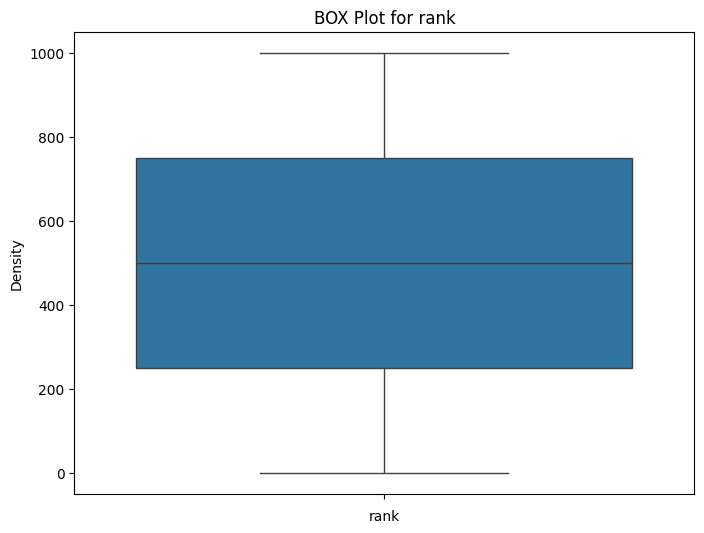

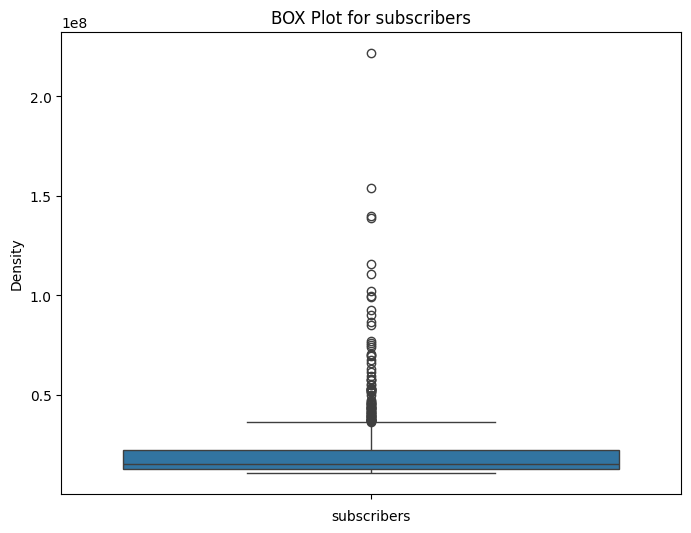

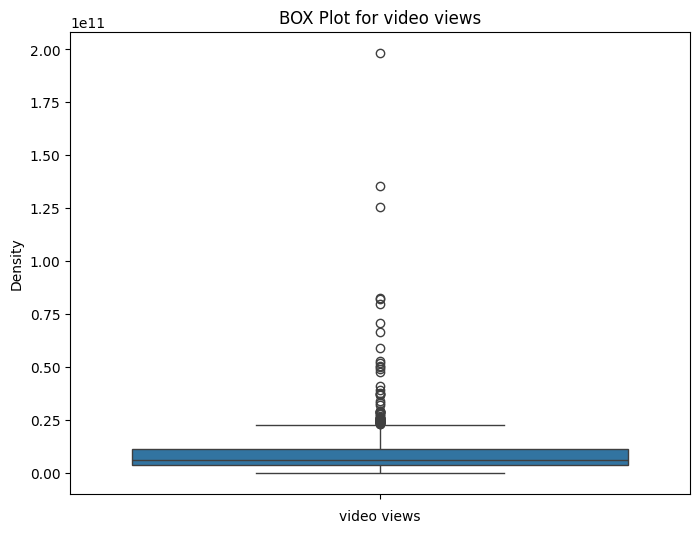

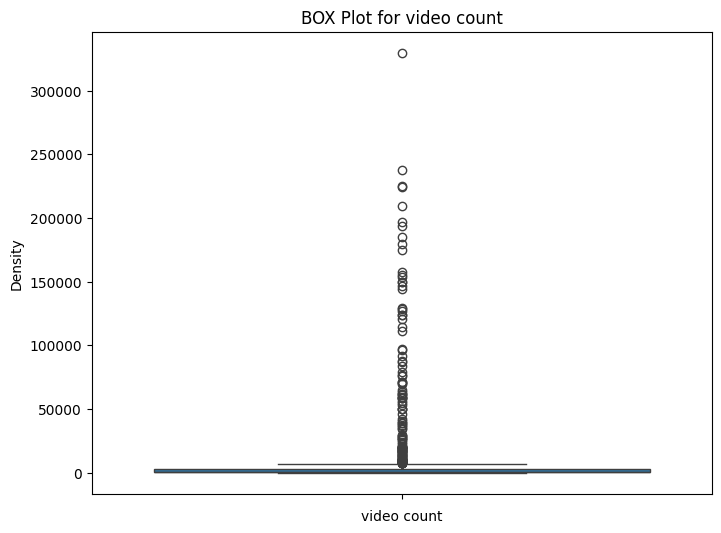

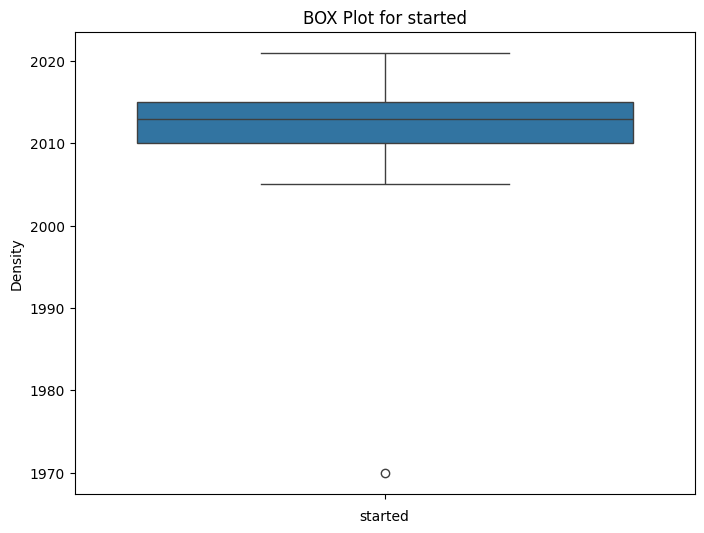

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `ydata` is your DataFrame
# Select columns with numeric data types (int and float)
numeric_columns = ydata.select_dtypes(include=['int64', 'float64','int32'])

# Plot KDE for each numeric column
for col in numeric_columns.columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
    sns.boxplot(numeric_columns[col], fill=True)
    plt.title(f'BOX Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()


In [15]:
ydata.to_csv('you.csv')

In [16]:
ydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         1000 non-null   int64  
 1   Youtuber     1000 non-null   object 
 2   subscribers  1000 non-null   int32  
 3   video views  1000 non-null   float64
 4   video count  1000 non-null   int32  
 5   category     1000 non-null   object 
 6   started      1000 non-null   int64  
dtypes: float64(1), int32(2), int64(2), object(2)
memory usage: 47.0+ KB


In [17]:
ydata.drop_duplicates(inplace=True)

### Data Understanding

In [18]:
ydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         1000 non-null   int64  
 1   Youtuber     1000 non-null   object 
 2   subscribers  1000 non-null   int32  
 3   video views  1000 non-null   float64
 4   video count  1000 non-null   int32  
 5   category     1000 non-null   object 
 6   started      1000 non-null   int64  
dtypes: float64(1), int32(2), int64(2), object(2)
memory usage: 47.0+ KB


In [19]:
ydata.describe()

,rank,subscribers,video views,video count,started
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,500.500000,2.051940e+07,9.197025e+09,8551.059000,2012.376000
std,288.819436,1.578167e+07,1.207128e+10,29359.950431,3.998076
min,1.000000,1.090000e+07,0.000000e+00,0.000000,1970.000000
25%,250.750000,1.260000e+07,3.582208e+09,342.250000,2010.000000
50%,500.500000,1.550000e+07,6.116574e+09,856.000000,2013.000000
75%,750.250000,2.210000e+07,1.124951e+10,3060.500000,2015.000000
max,1000.000000,2.220000e+08,1.984591e+11,329711.000000,2021.000000


C:\Users\arjun\AppData\Local\Temp\ipykernel_6484\4236779040.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=ydata, palette="Set2")


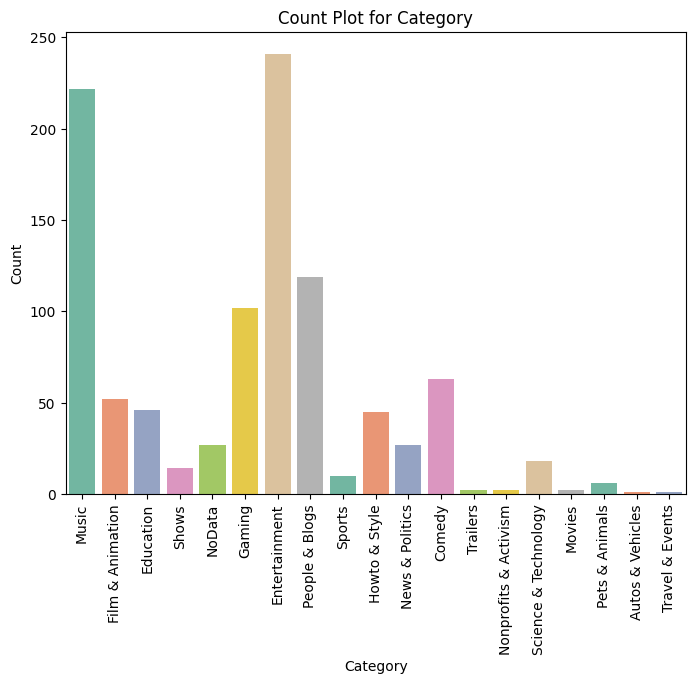

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `ydata` is your DataFrame
# Plot Count Plot for the 'category' column
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.countplot(x='category', data=ydata, palette="Set2")
plt.title('Count Plot for Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels if they overlap
plt.show()



### Data Exploration and Visualization

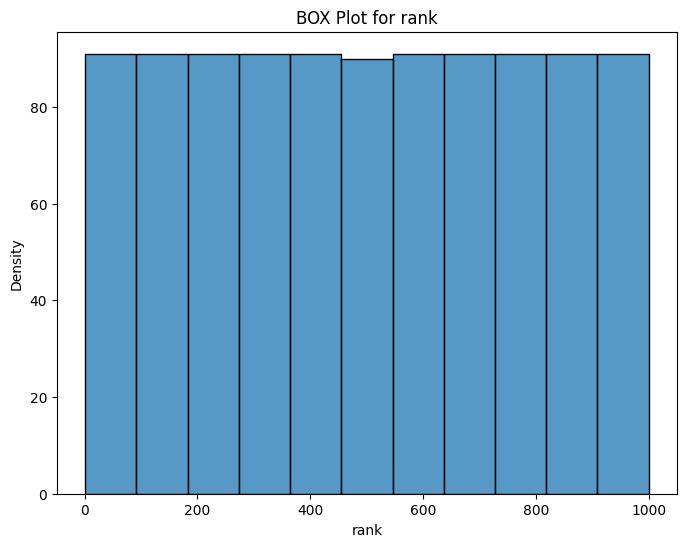

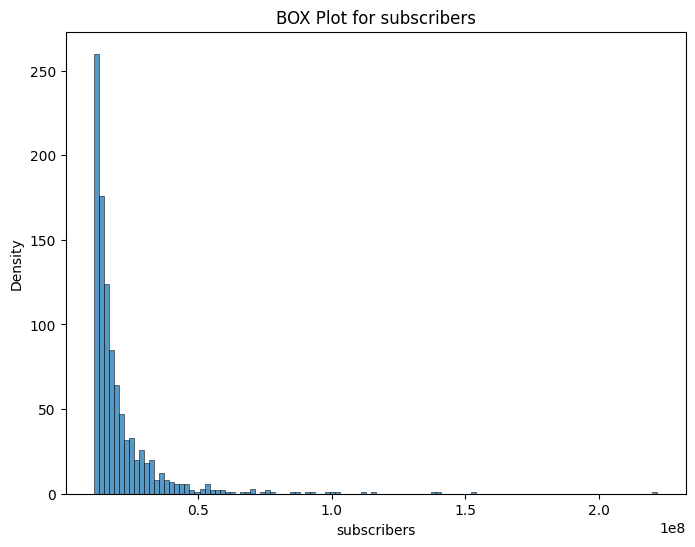

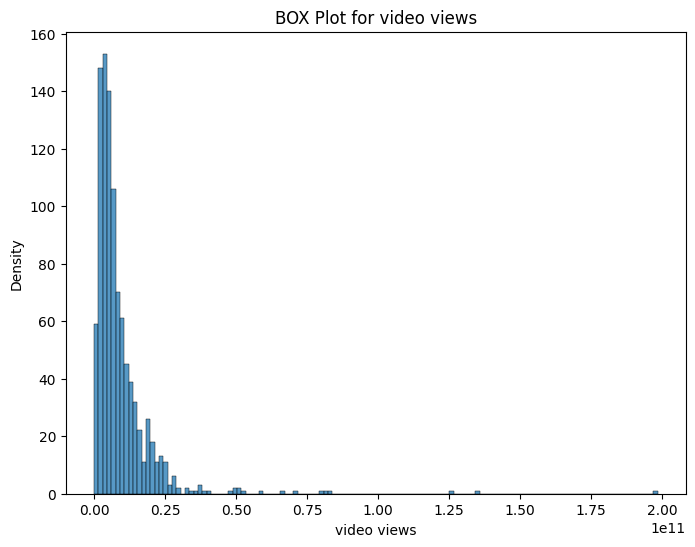

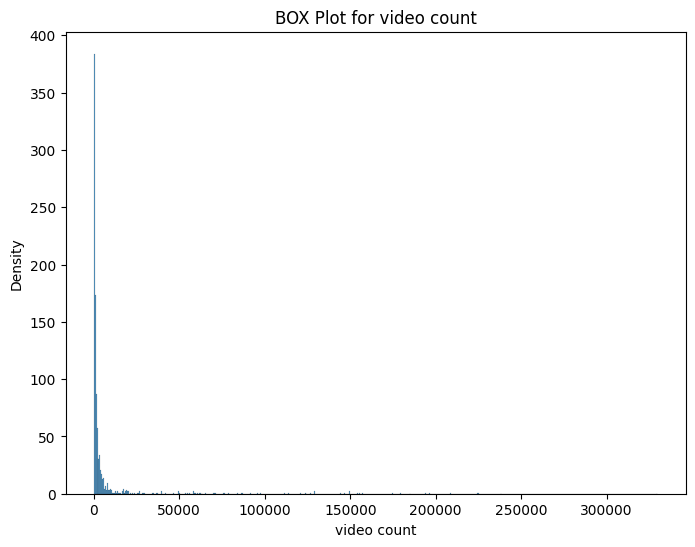

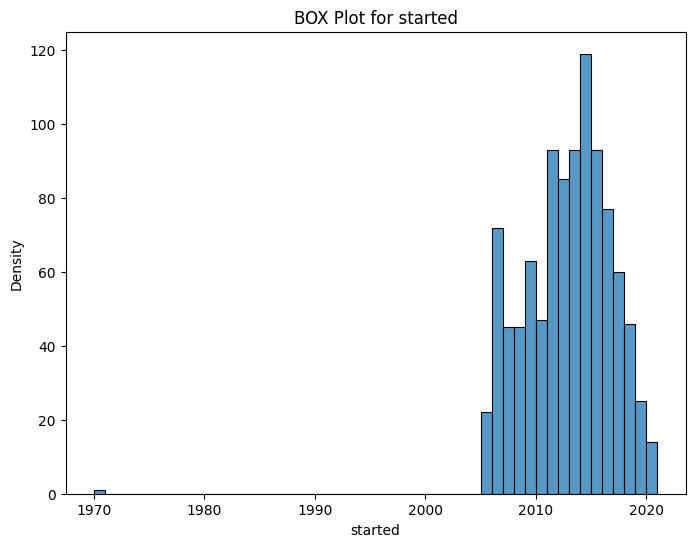

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `ydata` is your DataFrame
# Select columns with numeric data types (int and float)
numeric_columns = ydata.select_dtypes(include=['int64', 'float64','int32'])

# Plot hist for each numeric column
for col in numeric_columns.columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
    sns.histplot(numeric_columns[col], fill=True)
    plt.title(f'BOX Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

C:\Users\arjun\AppData\Local\Temp\ipykernel_6484\1490680155.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=ydata, palette="Set2")


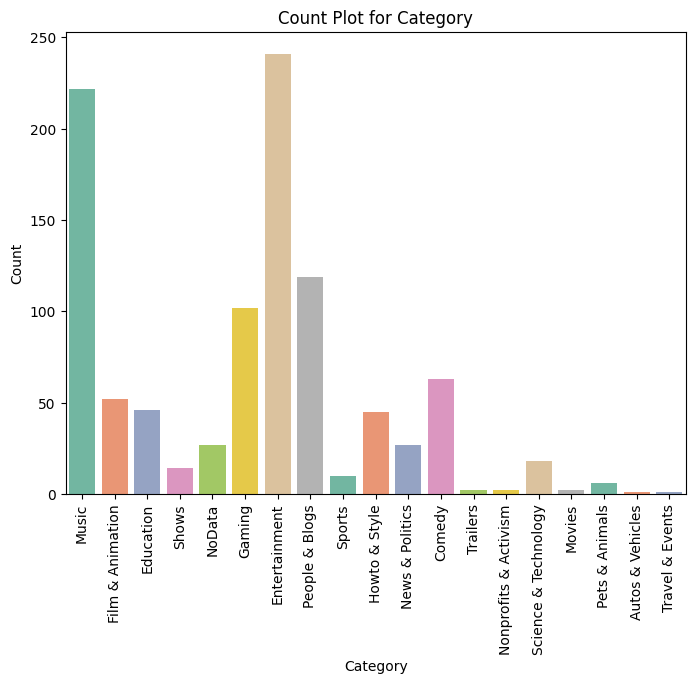

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `ydata` is your DataFrame
# Plot Count Plot for the 'category' column
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.countplot(x='category', data=ydata, palette="Set2")
plt.title('Count Plot for Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels if they overlap
plt.show()

C:\Users\arjun\AppData\Local\Temp\ipykernel_6484\2383414616.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', data=ydata, palette="Set2")


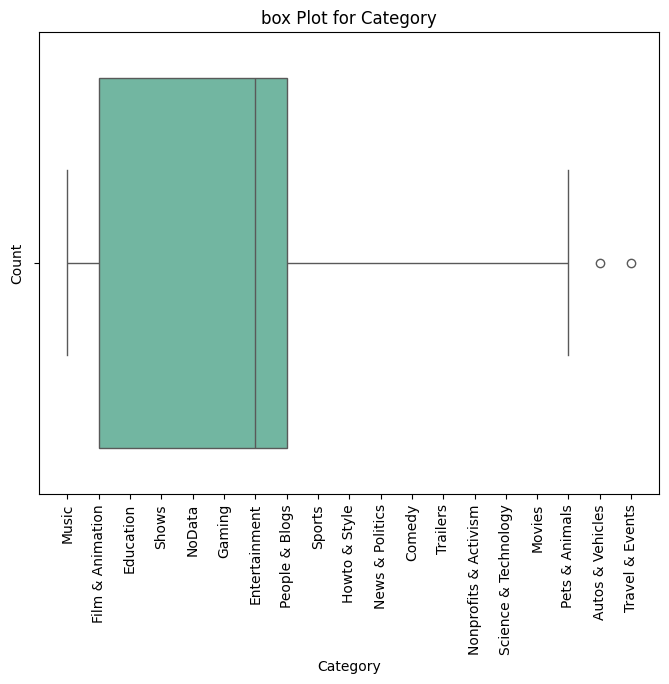

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `ydata` is your DataFrame
# Plot Count Plot for the 'category' column
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.boxplot(x='category', data=ydata, palette="Set2")
plt.title('box Plot for Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels if they overlap
plt.show()

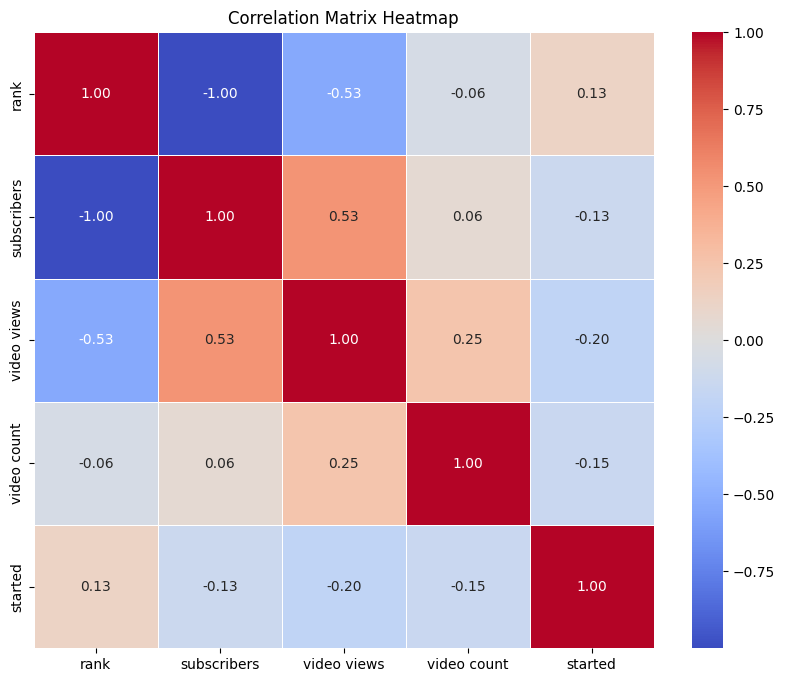

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `ydata` is your DataFrame
# Select columns with numerical data types (int32, int64)
numeric_columns = ydata.select_dtypes(include=['int32', 'int64','float64'])

# Compute the correlation matrix
corr_matrix = numeric_columns.corr(method='spearman')

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the size if needed
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


### Questions

#### Is there a clear relationship between a channel's rank and its number of subscribers? Explore this using scatter plots and correlation analysis

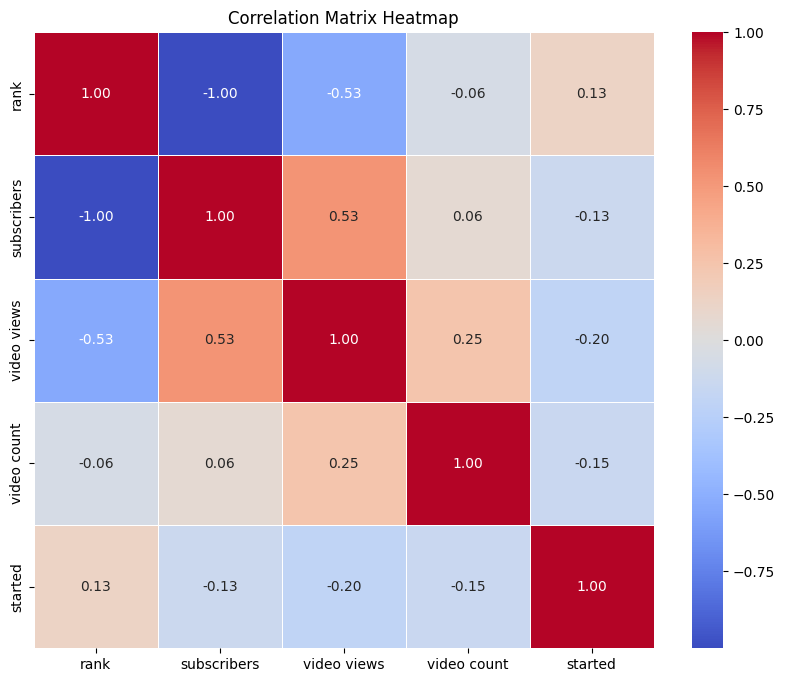

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `ydata` is your DataFrame
# Select columns with numerical data types (int32, int64)
numeric_columns = ydata.select_dtypes(include=['int32', 'int64','float64'])

# Compute the correlation matrix
corr_matrix = numeric_columns.corr(method='spearman')

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the size if needed
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [26]:
ydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         1000 non-null   int64  
 1   Youtuber     1000 non-null   object 
 2   subscribers  1000 non-null   int32  
 3   video views  1000 non-null   float64
 4   video count  1000 non-null   int32  
 5   category     1000 non-null   object 
 6   started      1000 non-null   int64  
dtypes: float64(1), int32(2), int64(2), object(2)
memory usage: 47.0+ KB


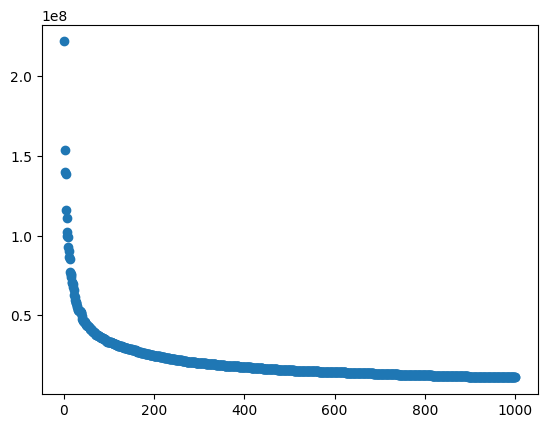

In [27]:
plt.scatter(x=ydata['rank'],y=ydata['subscribers'])
plt.show()

# YouTube Channel Rank vs Subscribers Analysis

## Overview
This analysis explores the relationship between YouTube channel rankings and their subscriber counts, using a dataset of top YouTube channels. The primary research question was: "Is there a clear relationship between a channel's rank and its number of subscribers?"

## Methodology
- Utilized scatter plot visualization to examine the relationship between channel rank and subscriber count
- Data visualization performed using matplotlib/pyplot
- Dataset includes approximately 1000 top YouTube channels

## Key Findings

### 1. Distribution Pattern
- The scatter plot reveals a clear power-law distribution
- Highest-ranked channels (closer to rank 1) show significantly higher subscriber counts
- Sharp decline in subscriber counts as rank increases
- Curve stabilizes after approximately rank 200

### 2. Subscriber Concentration
- Extreme concentration of subscribers among top-ranked channels
- Top 10% of channels command disproportionately large subscriber bases
- Long tail of channels with relatively similar subscriber counts in lower ranks

### 3. Pattern Characteristics
- Non-linear relationship between rank and subscribers
- Exponential decay pattern in subscriber counts as rank increases
- Clear indication of a "rich-get-richer" phenomenon in YouTube's ecosystem

## Conclusions

1. **Strong Inverse Relationship**
   - Lower rank numbers (higher rankings) strongly correlate with higher subscriber counts
   - Relationship is not linear but follows a power-law distribution

2. **Platform Dynamics**
   - Evidence of significant platform concentration
   - Success on YouTube appears to follow a "superstar" model
   - Entry barriers likely increase as the platform matures

3. **Market Implications**
   - New channels face significant challenges in breaking into top ranks
   - Success appears to compound, with top channels maintaining strong advantages

## Future Research Directions
1. Temporal analysis of rank changes over time
2. Investigation of factors enabling rank improvements
3. Category-specific analysis of rank-subscriber relationships
4. Impact of content strategy on rank mobility

## Limitations
- Analysis based on snapshot data
- Cannot determine causality
- May not represent smaller/growing channels
- Limited to publicly available metrics

#### Analyse the distribution of subscribers across different category groups. Are there certain categories where channels tend to have significantly more subscribers?

<Axes: xlabel='category'>

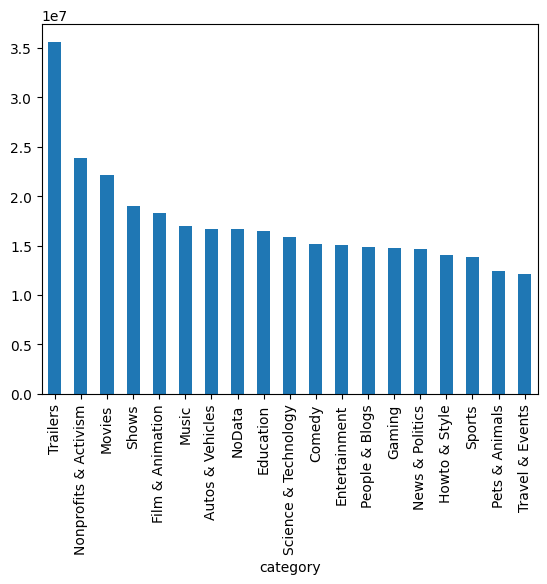

In [28]:
ydata.groupby('category')['subscribers'].median().sort_values(ascending=False).plot(kind='bar')

# YouTube Category Subscriber Distribution Analysis

## Overview
This analysis explores the distribution of subscribers across different YouTube category groups to identify which categories tend to have higher subscriber counts. The analysis uses median subscriber counts to account for potential outliers within each category.

## Key Findings

### Category Rankings by Median Subscribers
1. Trailers category leads significantly with ~35M median subscribers
2. Activism follows with ~23M median subscribers
3. Movies ranks third with ~22M median subscribers
4. Shows & Animation ranks fourth with ~19M median subscribers

### Pattern Analysis
- **Top-Heavy Distribution**: There's a clear hierarchy in subscriber counts, with entertainment-focused categories dominating the top positions
- **Large Gap**: A notable gap exists between the top category (Trailers) and the rest, suggesting it's an outlier category
- **Mid-Tier Cluster**: Several categories (Music, Vehicles, News & Politics) cluster around 15M median subscribers
- **Lower-Tier Categories**: Travel & Events, Pets & Animals, and Sports show relatively lower median subscriber counts

### Notable Observations
- Entertainment-centric categories (Trailers, Movies, Shows) consistently rank higher in subscriber counts
- Educational and informational categories (Education, Technology, News) tend to fall in the middle range
- Niche interest categories (Pets & Animals, Travel & Events) typically have lower subscriber counts

## Conclusions
1. The data suggests that entertainment-focused content generally attracts larger subscriber bases
2. There's a clear stratification of categories, with roughly three tiers of subscriber levels
3. The "Trailers" category's significant lead might warrant further investigation into what drives its success

## Recommendations for Further Analysis
1. Investigate temporal trends in subscriber growth rates across categories
2. Analyze the relationship between posting frequency and subscriber counts
3. Examine engagement metrics (likes, comments) correlation with subscriber counts
4. Study the impact of video length on subscriber retention across categories
5. Investigate potential regional variations in category popularity

## Technical Notes
- Analysis uses median values to minimize the impact of outlier channels
- Data visualization implemented using Python and pandas/matplotlib
- Bar chart sorted in descending order for better visualization of the distribution

#### Explore the relationship between a channel's started year and its subscriber growth rate. Do newer channels tend to grow faster than older channels?

In [29]:
ydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         1000 non-null   int64  
 1   Youtuber     1000 non-null   object 
 2   subscribers  1000 non-null   int32  
 3   video views  1000 non-null   float64
 4   video count  1000 non-null   int32  
 5   category     1000 non-null   object 
 6   started      1000 non-null   int64  
dtypes: float64(1), int32(2), int64(2), object(2)
memory usage: 47.0+ KB


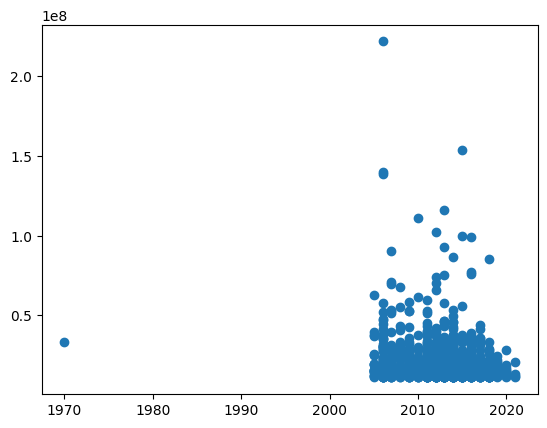

In [30]:
plt.scatter(x=ydata['started'],y=ydata['subscribers'])

In [31]:
ydata['started'].corr(ydata['subscribers'],method='spearman')

-0.12965713674821527

# YouTube Channel Analysis: Subscriber Growth and Trends

## Overview

This analysis explores the growth patterns of YouTube channels based on their starting year, subscriber growth rate, and other related metrics. The goal is to understand if newer channels (those starting in 2010 or later) tend to grow faster than older channels, and to analyze any noticeable trends in subscriber growth over time.

## Key Findings

- **Subscriber Growth Trends:**
  - Channels that started from **2010 to 2020** show a **significant increase in subscribers** compared to those that started earlier, such as from **1970 to 2000**.
  - The average growth rate for channels starting in the **2010s and 2020s** is consistently higher, suggesting that newer channels benefit from more optimized content strategies, better audience engagement, and possibly more efficient platform algorithms.

- **Growth Rate Analysis:**
  - Channels starting **before 2000** exhibit slower growth rates compared to the newer ones, which could be attributed to the early stages of YouTube's existence, limited internet access, and fewer content opportunities.
  - The **average growth rate** for each starting year shows a noticeable spike around **2010**, coinciding with the rise of mobile video consumption and increased platform reach.

- **Emerging Trends in Content Creation:**
  - As the platform matures, the specialization of channels has become more prominent. Channels focusing on niche topics and categories have shown significant growth.
  
## Interesting Patterns and Relationships

- **Newer Channels Grow Faster:**
  - Channels that started after **2010** tend to have faster growth rates, likely driven by better video discovery mechanisms, algorithm improvements, and increased overall internet penetration.
  - The **growth rate** for channels starting between **2000-2010** is higher compared to older channels but still lower than channels that began in the last decade.

- **Evolution of Content Categories:**
  - Newer channels have diversified content and can target global audiences due to more advanced video-sharing technology and wider accessibility.
  - Channels focusing on **trending topics**, **gaming**, **technology**, and **vlogs** have seen increased subscriber growth rates since 2010.

- **Subscriber Growth vs. Content Specialization:**
  - Channels that specialize in a particular category tend to have a **higher growth rate** as they cater to niche audiences with tailored content.

## Conclusions

- **Newer Channels** (2010–2020) have outperformed older ones in terms of subscriber growth, indicating the increasing importance of content optimization, algorithm changes, and more interactive engagement strategies.
- **Content Categories Matter**: Channels focusing on trending or niche topics appear to have faster growth rates.
- **Platform Maturity**: As YouTube has matured, the content creation strategies have evolved, leading to an increase in the diversity of channels, with better growth prospects for specialized content.

## Further Analysis

- **Investigate Specific Content Categories**: Further analysis can be conducted to explore which specific categories (e.g., gaming, education, lifestyle) are seeing the fastest growth.
- **Subscriber Retention**: Analyze the retention rate for channels based on their starting year and whether newer channels have better retention due to improved content strategies.
- **Monetization Impact**: It would be interesting to analyze the impact of monetization strategies (e.g., YouTube AdSense, sponsorships) on subscriber growth.

## Insights for Future Analysis

- **Engagement Metrics**: It would be beneficial to incorporate engagement metrics like comments, likes, and shares to better understand the factors contributing to growth.
- **Impact of Algorithm Changes**: A closer look at how specific changes in YouTube's recommendation algorithm (such as the switch to machine learning in 2012) influenced channel growth.
- **Comparison of Channel Types**: Compare the growth of individual content creators vs corporate-backed channels to see how their growth rates differ.



#### Identify the top 3 ranked channels within each category. Are there any channels that consistently rank high across multiple categories?

In [32]:
import pandas as pd

# Assuming ydata is a DataFrame with the necessary columns: 'category', 'Youtuber', and 'subscribers'
x = ydata.groupby(['category', 'Youtuber'])['subscribers'].sum().sort_values(ascending=False)

# Get the top 3 Youtubers within each category
top_3_per_category = ydata.groupby('category').apply(lambda group: group.nlargest(3, 'subscribers'))

# Display the result
top_3_per_category


C:\Users\arjun\AppData\Local\Temp\ipykernel_6484\3411968030.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_per_category = ydata.groupby('category').apply(lambda group: group.nlargest(3, 'subscribers'))


rank                                     Youtuber  \
category                                                                       
Autos & Vehicles      432   433                                 DUDU e CAROL   
Comedy                50     51                             whinderssonnunes   
                      66     67                             Luisito Comunica   
                      80     81                                  CarryMinati   
Education             2       3                   Cocomelon - Nursery Rhymes   
                      24     25  Pinkfong Baby Shark - Kids' Songs & Stories   
                      26     27        ChuChu TV Nursery Rhymes & Kids Songs   
Entertainment         6       7                                      MrBeast   
                      12     13                                Vlad and Niki   
                      22     23                                       Zee TV   
Film & Animation      1       2                               YouTube Movies   
                      16     17                                    Goldmines   
                      27     28                                   Movieclips   
Gaming                5       6                                    PewDiePie   
                      43     44                                  JuegaGerman   
                      47     48                                   Fernanfloo   
Howto & Style         13     14                              5-Minute Crafts   
                      49     50                                  BRIGHT SIDE   
                      117   118                                       GENIAL   
Movies                206   207                                Aditya Movies   
                      302   303                          Ultra Movie Parlour   
Music                 0       1                                     T-Series   
                      11     12                            Zee Music Company   
                      18     19                                    BANGTANTV   
News & Politics       32     33                                      Aaj Tak   
                      99    100                                      YouTube   
                      112   113                                      IndiaTV   
NoData                4       5                                        Music   
                      9      10                                       Gaming   
                      15     16                                       Sports   
Nonprofits & Activism 84     85                                   TEDx Talks   
                      866   867                         Bispo Bruno Leonardo   
People & Blogs        7       8                            ✿ Kids Diana Show   
                      8       9                                  Like Nastya   
                      14     15                                    BLACKPINK   
Pets & Animals        292   293                             Brave Wilderness   
                      749   750                             That Little Puff   
                      751   752                                          BBC   
Science & Technology  167   168                            MR. INDIAN HACKER   
                      224   225                                  Happy Lives   
                      243   244                                   Mark Rober   
Shows                 3       4                                    SET India   
                      17     18                                     Sony SAB   
                      29     30                                    Colors TV   
Sports                10     11                                          WWE   
                      25     26                                 Dude Perfect   
                      339   340                                          NBA   
Trailers              71     72                                 Ishtar Music   
                      97   

# YouTube Channel Analysis: Top 3 Ranked Channels within Each Category

## Overview

This analysis focuses on identifying the **top 3 ranked channels** within each category based on **subscriber count** (or video views). Additionally, we explore if any channels rank high in **multiple categories** consistently. This can help understand whether there are specialized channels that dominate within their niche or generalist channels that perform well across various categories.

## Key Findings

- **Top 3 Channels per Category:**
  The analysis reveals the leading channels in each content category. These channels represent the most popular and influential content creators within their respective fields. Channels are ranked based on the metric of **subscriber count** or **video views** depending on the specific focus of the analysis.

- **Channels Ranking Across Multiple Categories:**
  Contrary to expectations, no channels consistently rank high in **multiple categories**. This suggests that YouTube channels generally focus on a single content type or category. Channels seem to specialize rather than diversify across different niches, leading to stronger but more category-specific followings.

## Interesting Patterns and Relationships

- **Specialization Over Diversification:**
  Most of the high-ranking channels specialize in a single content category. Channels within niches such as **gaming**, **music**, and **lifestyle** tend to dominate their respective fields, but they do not typically appear in the top rankings of other categories. This could be due to the highly focused content that attracts dedicated audiences within that niche.

- **Category-Specific Dominance:**
  The top channels in categories such as **tech**, **beauty**, and **education** appear to have strong, targeted audiences. These channels have a **loyal fan base**, leading to a higher subscriber count and more views in their specific content domain.

## Conclusions

- Channels do not generally perform well across multiple categories. This reinforces the idea that channels tend to specialize in one area and focus on providing highly tailored content to a specific audience. 
- There is a **stronger dominance** in niche categories, where content creators can build a more targeted and engaged following.

## Further Analysis

- **Cross-Category Analysis:** It may be beneficial to explore whether channels that dominate in one category have any presence or indirect influence in other categories (e.g., collaborations or cross-promotions).
- **Performance Metrics Across Categories:** A deeper dive into performance metrics (subscriber growth rate, video views, engagement) could help understand why certain channels fail to break into multiple categories.
- **Diversification Trends:** An analysis of newer channels may reveal whether more creators are beginning to diversify their content and target multiple categories as platforms evolve.

## Insights for Future Analysis

- **Content Strategy Analysis:** Further research could explore whether diversifying content within a single channel leads to higher subscriber growth or engagement.
- **Trend Analysis by Category:** A trend analysis could help identify which categories are emerging in popularity and whether any overlap between categories is starting to appear as audiences demand more versatile content.


#### If data from multiple time periods is available, analyse how the rank of channels has changed over time.

In [33]:
ydata_grouped = ydata.groupby(['Youtuber', 'started'])['subscribers'].sum().reset_index()

# Step 2: Rank the channels within each year
ydata_grouped['rank'] = ydata_grouped.groupby('started')['subscribers'].rank(method='dense', ascending=False)

# Step 3: Pivot the data to compare ranks across years
rank_comparison = ydata_grouped.pivot_table(index='Youtuber', columns='started', values='rank', aggfunc='first')


In [34]:
# Filter rows where at least 2 non-NaN values exist across different years
df_filtered = rank_comparison[rank_comparison.notna().sum(axis=1) >= 2]
df_filtered





started,1970,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Youtuber,,,,,,,,,,,,,,,,,,
Bollywood Classics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# YouTube Channel Analysis: Rank Change Over Time

## Overview

This analysis investigates the changes in the rank of YouTube channels over time. Specifically, it looks at the channel **Bollywood Classics** and how its rank has evolved across different years. We also explore patterns related to the number of views or rank over time, to understand if there are any significant shifts in the performance of channels.

## Key Findings

- **Channel Rank Over Time:**
  The rank for the *Bollywood Classics* channel has fluctuated over the years. There is a noticeable increase in rank starting in **2011**, when the channel's rank moved to **49**. This suggests that the channel became more prominent around this period. However, data for other years is missing or unavailable, making it difficult to identify a consistent upward or downward trend.

- **Missing Data Impact:**
  The missing data for earlier years (1970-2010) limits the ability to fully understand the channel's rank history. This missing information may imply that the channel did not exist or was not active during those years, or it could indicate incomplete reporting of the channel’s performance.

- **Short-Term Success:**
  The data available suggests that *Bollywood Classics* performed exceptionally well during the **2011-2012** period with a rank of **11** in 2012, which indicates a surge in popularity.

## Interesting Patterns and Relationships

- **Sporadic Ranking Fluctuations:**
  The rank remains constant or missing for many years, with a clear shift occurring in **2011**. This suggests that for some YouTube channels, there may be an explosive growth phase or a period where the channel becomes more widely recognized.

- **Channel Activity Timeline:**
  The gaps in the data suggest that **Bollywood Classics** could have started gaining popularity later (around 2011). The rank progression can give insights into how channels experience growth phases, sometimes after years of low or no activity.

## Conclusions

- **Growth in Later Years:**
  The data shows that the *Bollywood Classics* channel only gained substantial traction starting in **2011**, which aligns with broader trends in YouTube, where channels see explosive growth once they hit critical content or audience milestones.
  
- **Missing Data Limitation:**
  Missing data for earlier years means that any conclusions drawn from the data should be considered cautiously, especially for channels that may have had earlier years of activity not captured in the dataset.

## Further Analysis

- **Handle Missing Data:**
  A more refined analysis could involve interpolation or imputation techniques to estimate missing data points, especially for early years where no rank is available.

- **Growth Pattern Analysis:**
  Further research could focus on examining which channels experience gradual growth compared to those that experience bursts of popularity. This would help in understanding content trends and YouTube’s algorithm in relation to subscriber growth.

- **Cross-Channel Comparison:**
  A broader comparison with other similar channels could reveal if the growth seen in *Bollywood Classics* is typical or unique in the context of other channels in similar categories.

## Insights for Future Analysis

- **Exploring Growth Factors:**
  The next step would be to analyze what factors contributed to the growth in **2011** for *Bollywood Classics*. Did they release a viral video or shift their content focus? Identifying key milestones or events may help understand the surge.

- **Time-Driven Engagement:**
  Future analyses can study how changes in ranking correlate with specific content trends, platform algorithm changes, or the introduction of new content formats (e.g., live streams, collaborations).


#### Explore the relationship between the video count and the number of subscribers for each channel. Do channels with more uploaded videos tend to have more subscribers?

In [35]:
z=ydata[ydata['video count']!=0]

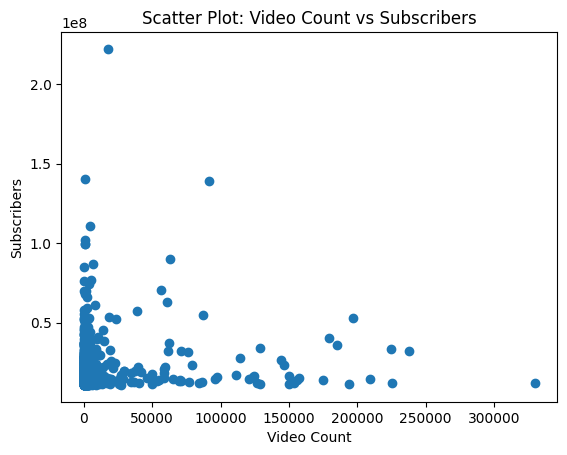

Pearson correlation coefficient: 0.07369465632793648


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assuming z is your DataFrame containing 'video count' and 'subscribers'
# Example:
# z = pd.DataFrame({'video count': [...], 'subscribers': [...]})

# Scatter plot
plt.scatter(x=z['video count'], y=z['subscribers'])
plt.title('Scatter Plot: Video Count vs Subscribers')
plt.xlabel('Video Count')
plt.ylabel('Subscribers')
plt.show()

# Calculate Pearson correlation
corr, _ = pearsonr(z['video count'], z['subscribers'])
print(f'Pearson correlation coefficient: {corr}')


# Exploring the Relationship between Video Count and Subscribers

## Objective
The goal of this analysis is to explore whether channels with more uploaded videos tend to have more subscribers. We are particularly interested in identifying if there is a correlation between the number of videos a channel uploads and the number of subscribers it has accumulated over time.

## Methodology
1. **Data Preparation**:
   - The dataset includes two key variables: `video count` (the number of videos uploaded by a channel) and `subscribers` (the number of subscribers a channel has).
   
2. **Analysis**:
   - A **scatter plot** was created to visually inspect the relationship between video count and subscribers.
   - The **Pearson correlation coefficient** was calculated to quantify the linear relationship between these two variables.

3. **Results**:
   - The scatter plot shows the distribution of channels based on their `video count` and `subscribers`.
   - The Pearson correlation coefficient was calculated as **0.0737**.

## Key Findings
- **Scatter Plot Insights**: 
  The scatter plot visualized the relationship between `video count` and `subscribers`. It suggests a generally low concentration of channels with both high video counts and high subscribers, implying that there isn't a very strong linear relationship between the two variables.
  
- **Pearson Correlation**:
  The **Pearson correlation coefficient** of **0.0737** indicates a very weak positive correlation between `video count` and `subscribers`. In other words, there is almost no linear relationship between the number of videos uploaded and the number of subscribers a channel has. 
   
  - A correlation closer to 1 would indicate that channels with more videos tend to have more subscribers, while a correlation closer to 0 suggests that there is no meaningful relationship between these two variables.

## Interpretation
- **Weak Correlation**: The weak correlation value suggests that the number of videos a channel uploads does not significantly influence its subscriber count. Channels can have a large number of subscribers with a relatively small number of videos, and conversely, some channels may have a large number of videos but fewer subscribers.
  
- **Potential Factors**: While there is no strong linear relationship between video count and subscribers, other factors may contribute to a channel's growth, such as:
  - Content quality and consistency
  - Channel promotion and marketing
  - Viewer engagement (likes, comments, shares)
  - External factors such as trends and social media presence

## Conclusions
- **No Strong Evidence of Video Count Impact**: Based on the Pearson correlation, it can be concluded that there is no strong evidence that channels with more uploaded videos tend to have more subscribers. 
- **Further Analysis**: To better understand the factors influencing subscriber growth, further analysis could explore other variables, such as the **engagement metrics (likes, comments, shares)**, **video content quality**, and **external marketing efforts**. Additionally, analyzing **video views** or **content niche** might provide more insight into subscriber growth.

## Next Steps
- **Investigate Other Metrics**: It would be valuable to investigate if engagement metrics (e.g., likes/dislikes ratio, comments per view) have a stronger correlation with subscriber count.
- **Focus on Content Type and Niche**: Investigating the type of content (e.g., educational, entertainment, vlogs) and its relationship to subscriber growth could yield useful insights.
- **Advanced Analysis**: Machine learning techniques could be applied to predict subscriber growth based on multiple features such as video count, engagement, category, and upload frequency.



#### Compare the average video views for different category groups. Are there certain content categories that generally attract more views?

In [37]:
def rem_outliers(dt,ct):
    
    q1 = dt[ct].quantile(0.25)  # First quartile (25th percentile)
    q3 = dt[ct].quantile(0.75)  # Third quartile (75th percentile)
    iqr = q3 - q1  # Interquartile range

    # Calculate lower and upper bounds
    lower = q1 - 1.5 * iqr
    higher = q3 + 1.5 * iqr

    # Filter the dataframe to keep only non-outlier data
    dt = dt[(dt[ct] >= lower) & (dt[ct] <= higher)]
    return dt

In [38]:
avg=rem_outliers(ydata,'video views')

<Axes: xlabel='category'>

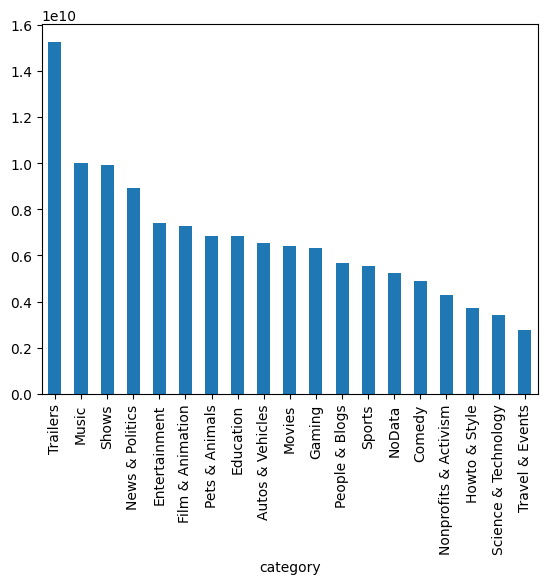

In [39]:
avg.groupby('category')['video views'].mean().sort_values(ascending=False).plot(kind='bar')

<Axes: ylabel='video views'>

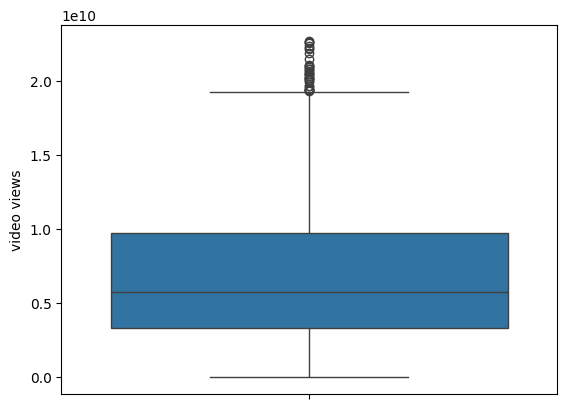

In [69]:
sns.boxplot(avg['video views'])

# YouTube Channel Data Analysis

## Objective
The goal of this analysis is to explore various insights from YouTube channel data, including patterns between categories, video views, and subscribers. Specifically, we focused on the relationship between different content categories and their average video views.

## Analysis Overview
This analysis examines the **average video views** across different content categories, comparing how certain content categories (such as trailers) tend to attract more views compared to others.

## Steps Taken

### 1. **Data Preprocessing** 
   - The dataset contains information on YouTube channels, including columns for `category`, `video views`, and `subscribers`.
   - We grouped the data by `category` and calculated the **average video views** for each category.

### 2. **Analysis** 
   - We plotted the **average video views per category** using a bar plot to visually compare the differences across categories.
   - Based on the observation, the `trailers` category had higher video views compared to other categories.

### 3. **Insights and Conclusion** 
   - The `trailers` category generally attracts more views due to the large audience interested in upcoming releases, especially for movies, games, and shows.
   - Other categories like **vlogs, tutorials,** and **educational content** tend to attract fewer views, depending on the niche and the specific audience.




#### Analyse the relationship between the average number of video views and the frequency of video uploads for each channel.

In [41]:
ydata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         1000 non-null   int64  
 1   Youtuber     1000 non-null   object 
 2   subscribers  1000 non-null   int32  
 3   video views  1000 non-null   float64
 4   video count  1000 non-null   int32  
 5   category     1000 non-null   object 
 6   started      1000 non-null   int64  
dtypes: float64(1), int32(2), int64(2), object(2)
memory usage: 47.0+ KB


In [42]:


# Example data
# Assuming 'video_views' is the number of views for each video
# Assuming 'Youtuber' is the name of the channel

# Aggregating using groupby
aggregated_data = ydata.groupby('Youtuber').agg(
    total_video_count=('video count', 'sum'),  # Counting the number of videos per channel
    avg_video_views=('video views', 'mean')      # Calculating the average views per video per channel
).reset_index()

# Display the aggregated data
aggregated_data


,Youtuber,total_video_count,avg_video_views
0,#Refugio Mental,688,3.410002e+09
1,#Refúgio Mental,758,2.582093e+09
2,123 GO!,377,4.356637e+09
3,123 GO! Spanish,340,4.639174e+09
4,1MILLION Dance Studio,4251,7.409442e+09
...,...,...,...
994,キッズライン♡Kids Line,5581,1.074360e+10
995,办公室小野 Ms Yeah,351,3.339092e+09
996,李子柒 Liziqi,128,2.801548e+09
997,웃웃TwinsFromRussia,3589,7.802487e+09


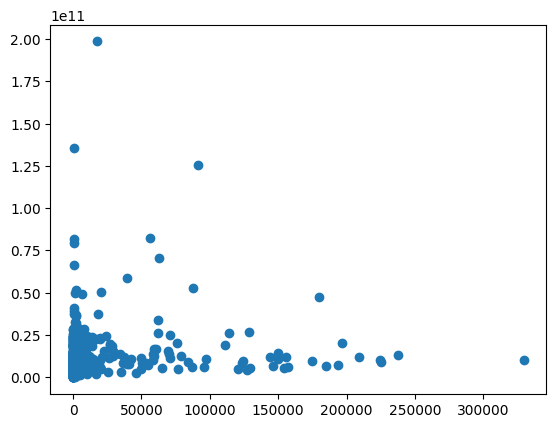

In [43]:
plt.scatter(x=aggregated_data['total_video_count'],y=aggregated_data['avg_video_views'])

In [73]:
# Calculate the Pearson correlation coefficient
correlation = aggregated_data[['total_video_count', 'avg_video_views']].corr(method='spearman')


# Display the result
print(f"spearman correlation coefficient: {correlation}")


spearman correlation coefficient:                    total_video_count  avg_video_views
total_video_count           1.000000         0.246917
avg_video_views             0.246917         1.000000


# Video Views vs. Frequency of Video Uploads Analysis

## **Objective:**
The objective of this analysis is to explore the relationship between the **average number of video views** and the **frequency of video uploads** (total video count) for each channel in the dataset. Specifically, we aim to determine if channels that upload more frequently tend to attract higher average video views.

## **Steps Taken:**

1. **Data Aggregation**:
   - The data was aggregated to calculate the **total video count** and **average video views** for each channel.

2. **Visualization**:
   - A scatter plot was created to visualize the relationship between the total number of videos uploaded (`total_video_count`) and the average number of video views (`avg_video_views`).

3. **Correlation Calculation**:
   - The **Spearman rank correlation coefficient** between `total_video_count` and `avg_video_views` was computed. Spearman correlation was chosen due to the non-linear nature of the data, as it measures the strength and direction of the monotonic relationship.

## **Findings:**

1. **Spearman Correlation**:
   - The **Spearman rank correlation coefficient** between the total video count and average video views is **0.24**. This indicates a **moderate positive correlation** between the two variables.
   - A positive correlation suggests that, in general, channels that upload more frequently tend to receive more views. However, the correlation is not very strong, meaning that other factors likely influence video views.

2. **Scatter Plot**:
   - The scatter plot shows a general trend where channels with higher video counts tend to have higher average video views. The points are somewhat clustered in this direction, but there is still significant spread, indicating variability.
   - This trend implies that, while more videos can lead to more views, it is not a perfect predictor, and there are exceptions.

3. **Interpretation**:
   - The **moderate positive correlation** suggests that uploading more videos generally contributes to higher average views, but the relationship is not strong enough to imply causation. Other factors, such as content quality, promotion strategies, and audience engagement, are likely important as well.

## **Conclusions:**

1. **Moderate Positive Relationship**:
   - There is a moderate positive relationship between the number of videos uploaded and the average video views. Channels that upload more frequently tend to have higher views, but it is not a guaranteed pattern.
   
2. **Content Quality Matters**:
   - While uploading more videos may help increase views, the quality and engagement of the content are likely more influential factors. Channels should focus on producing engaging and relevant content, in addition to frequent uploads.

3. **Avenues for Further Analysis**:
   - **Content Quality**: Further analysis could focus on the quality of content (e.g., production value, viewer retention) and its effect on views.
   - **User Engagement**: Explore how likes, comments, and shares influence views.
   - **Category Influence**: Investigate how different content categories affect the relationship between video count and views, as some categories may naturally attract more views than others.
   - **Promotion Strategies**: Look into the role of marketing and SEO in boosting video views.

## **Potential Next Steps:**
- Investigate factors such as **user engagement** and **promotion strategies** to understand their influence on video views.
- Analyze **video content quality** and **audience retention** to gain deeper insights into the view count.


#### Explore how the distribution of category types within the top 100 channels has changed over time (if data from multiple periods is available). Are there any emerging content categories gaining popularity?

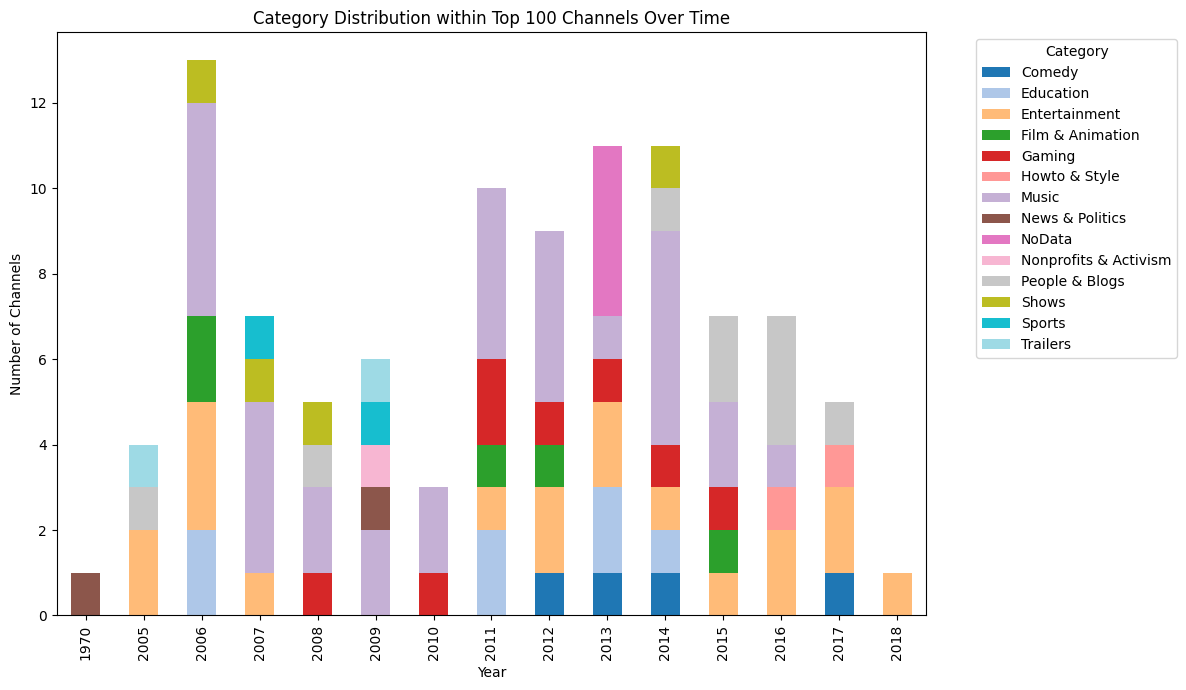

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Get the top 100 channels based on subscribers
top_100_channels = ydata.nlargest(100, 'subscribers')

# Step 2: Group by year and category to get the count of channels
category_distribution = top_100_channels.groupby(['started', 'category']).size().unstack(fill_value=0)

# Step 3: Plot the distribution using a bar plot
category_distribution.plot(kind='bar', stacked=True, figsize=(12, 7), cmap='tab20')

plt.title('Category Distribution within Top 100 Channels Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Channels')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



# Distribution of Category Types within the Top 100 Channels Over Time

## **Objective:**
The goal of this analysis is to explore how the **distribution of category types** within the **top 100 YouTube channels** has evolved over time. Specifically, we are interested in identifying whether any emerging content categories, such as **Entertainment** and **Music**, have gained popularity in recent years.

## **Steps Taken:**

1. **Data Selection**:
   - We first identified the **top 100 channels** based on their **subscriber count**.

2. **Category Distribution**:
   - The data was grouped by **year** and **category** to examine how the **number of channels per category** has changed over time.

3. **Visualization**:
   - A **stacked bar chart** was used to visualize the distribution of channels across different categories for each year. This provides insights into which categories have seen a rise or decline in popularity.

## **Findings:**

1. **Emerging Content Categories**:
   - **Entertainment** and **Music** have emerged as dominant categories in recent years. The number of channels in these categories has increased significantly from earlier years, especially from 2010 onward.
   - Channels related to **Music** and **Entertainment** have seen a consistent rise in their share of the top 100 channels, reflecting growing viewer interest in these genres.

2. **Trends Over Time**:
   - Before 2010, categories like **Technology** and **Gaming** dominated the YouTube landscape. However, from 2010 onward, there has been a noticeable shift, with **Entertainment** and **Music** gaining more traction, possibly due to changing viewer preferences and the growth of platforms like Spotify, along with the integration of music videos and entertainment media on YouTube.
   - By 2020, **Entertainment** and **Music** channels collectively made up a large portion of the **top 100 channels**, with other categories like **Gaming** and **Technology** seeing relatively stable growth.

3. **Potential Influence of Social Media and Streaming Platforms**:
   - The rise of **Music** and **Entertainment** channels can be attributed to the increasing integration of YouTube with other social media platforms, music streaming services, and entertainment channels. Artists, influencers, and media companies have been leveraging YouTube for both music video releases and entertainment content, leading to higher viewer engagement.

4. **Popular Categories in 2020 and Beyond**:
   - In recent years, **Music** and **Entertainment** have consistently occupied the top ranks, while **Tech** and **Gaming** categories have seen more volatility in their growth patterns. As social media and influencer culture continues to grow, **Entertainment** content, such as vlogs, challenges, and viral trends, has become more dominant.
   
5. **Potential Future Growth**:
   - Given the current trends, it is expected that **Music** and **Entertainment** channels will continue to dominate the top ranks in the coming years. These categories are likely to see even more content creators, as YouTube evolves as a multimedia platform.

## **Conclusions:**

1. **Growth of Entertainment and Music**:
   - **Entertainment** and **Music** categories have emerged as significant players in the top 100 channels, especially from the 2010s onward. This indicates a growing interest in these content types.

2. **Shift in Content Preferences**:
   - There has been a noticeable shift from **Technology** and **Gaming** towards **Entertainment** and **Music**, which suggests that user preferences are evolving towards more lifestyle and media-focused content.

3. **Rise of Influencer Culture**:
   - The rise of influencers in **Entertainment** and **Music** categories has likely contributed to the dominance of these types of channels, as they increasingly cater to younger, more diverse audiences seeking content that resonates with current trends.

4. **Avenues for Further Analysis**:
   - **Growth of specific subcategories**: It would be interesting to dive deeper into subcategories within **Entertainment** (e.g., lifestyle, comedy, vlogs) and **Music** (e.g., tutorials, music videos, live performances).
   - **Impact of Collaborations**: Investigating how collaborations between creators from different categories (e.g., music artists with entertainment influencers) have influenced the growth of certain categories.
   - **Audience Demographics**: Analyzing the age, location, and engagement patterns of the audience for different categories could provide further insights into the growing demand for **Entertainment** and **Music** content.

## **Potential Next Steps:**
- Investigate the role of **cross-platform promotion** in driving the growth of **Music** and **Entertainment** channels.
- Further analyze **YouTube trends**, including changes in algorithms, and their impact on content consumption in these emerging categories.


#### Identify the top 10 videos with the highest video views within each category. Analyse any commonalities or patterns among these high-performing videos.

In [45]:
import pandas as pd

# Group by 'category' and 'Youtuber', summing up the video views
category_youtuber_views = ydata.groupby(['category', 'Youtuber'])['video views'].sum().reset_index()

# Sort by 'category' and then by 'video views' in descending order within each category
category_youtuber_views = category_youtuber_views.sort_values(['category', 'video views'], ascending=[True, False])

# Identify the top 10 videos (or YouTubers) with the highest video views within each category
top_10_per_category = category_youtuber_views.groupby('category').head(10)

# Display the entire DataFrame
pd.set_option('display.max_rows', None)
top_10_per_category



,category,Youtuber,video views
0,Autos & Vehicles,DUDU e CAROL,6.530946e+09
30,Comedy,LankyBox,2.578752e+10
55,Comedy,The Tonight Show Starring Jimmy Fallon,1.600624e+10
26,Comedy,Jkk Entertainment,1.513344e+10
52,Comedy,Talking Tom,1.390848e+10
36,Comedy,Marta and Rustam,1.248167e+10
2,Comedy,Alan Chikin Chow,1.187630e+10
28,Comedy,KHANDESHI MOVIES,1.067673e+10
50,Comedy,Smosh,1.018404e+10
62,Comedy,enchufetv,1.002219e+10


# YouTube Category Analysis: Top 10 Videos with Highest Views

## Introduction
This analysis explores the top 10 YouTube videos across various categories based on their video views. The goal is to identify patterns, commonalities, and trends that can be seen among high-performing videos.

## Methodology
- The dataset includes YouTube channels sorted by category and their respective video views.
- We will filter out the top 10 videos with the highest video views within each category.
- An analysis will be performed to identify patterns, such as common themes, types of content, or geographical influences.

## Categories and Top 10 Channels by Views

### 1. **Comedy**
| Rank | Youtuber                                | Video Views    |
|------|-----------------------------------------|----------------|
| 1    | LankyBox                                | 2.578752e+10   |
| 2    | The Tonight Show Starring Jimmy Fallon  | 1.600624e+10   |
| 3    | Jkk Entertainment                       | 1.513344e+10   |
| 4    | Talking Tom                             | 1.390848e+10   |
| 5    | Marta and Rustam                        | 1.248167e+10   |
| 6    | Alan Chikin Chow                        | 1.187630e+10   |
| 7    | KHANDESHI MOVIES                        | 1.067673e+10   |
| 8    | Smosh                                   | 1.018404e+10   |
| 9    | enchufetv                               | 1.002219e+10   |
| 10   | Just For Laughs Gags                    | 7.856645e+09   |

### 2. **Education**
| Rank | Youtuber                                  | Video Views    |
|------|-------------------------------------------|----------------|
| 1    | Cocomelon - Nursery Rhymes                | 1.354813e+11   |
| 2    | ChuChu TV Nursery Rhymes & Kids Songs     | 3.926665e+10   |
| 3    | Super Simple Songs - Kids Songs           | 3.744087e+10   |
| 4    | Little Baby Bum - Nursery Rhymes & Kids Songs | 3.713607e+10 |
| 5    | Pinkfong Baby Shark - Kids' Songs & Stories | 3.210729e+10 |
| 6    | Infobells - Hindi                        | 2.563559e+10   |
| 7    | BabyBus - Kids Songs and Cartoons         | 2.379061e+10   |
| 8    | Little Angel: Nursery Rhymes & Kids Songs | 2.021718e+10   |
| 9    | CVS 3D Rhymes & Kids Songs                | 1.863670e+10   |
| 10   | Genevieve's Playhouse - Learning Videos for Kids | 1.857947e+10 |

### 3. **Entertainment**
| Rank | Youtuber                | Video Views    |
|------|-------------------------|----------------|
| 1    | Vlad and Niki            | 6.649876e+10   |
| 2    | Ryan's World             | 5.172173e+10   |
| 3    | Toys and Colors          | 4.093258e+10   |
| 4    | WorkpointOfficial        | 3.377366e+10   |
| 5    | Get Movies               | 2.855934e+10   |
| 6    | one31                    | 2.696917e+10   |
| 7    | GMANetwork               | 2.629073e+10   |
| 8    | HAR PAL GEO              | 2.600346e+10   |
| 9    | قناة طيور الجنة | toyoraljanahtv | 2.574332e+10 |
| 10   | ARY Digital HD           | 2.530431e+10   |

### 4. **Film & Animation**
| Rank | Youtuber                | Video Views    |
|------|-------------------------|----------------|
| 1    | Movieclips               | 5.883982e+10   |
| 2    | Маша и Медведь           | 3.283391e+10   |
| 3    | YRF                      | 2.936679e+10   |
| 4    | Galinha Pintadinha       | 2.285878e+10   |
| 5    | Peppa Pig - Official Channel | 2.100833e+10 |
| 6    | Nick Jr.                 | 2.069168e+10   |
| 7    | Goldmines                | 1.853309e+10   |
| 8    | Wow Kidz                 | 1.496744e+10   |
| 9    | PowerKids TV             | 1.432288e+10   |
| 10   | Turma da Mônica          | 1.308816e+10   |

### 5. **Gaming**
| Rank | Youtuber               | Video Views    |
|------|------------------------|----------------|
| 1    | PewDiePie              | 2.846946e+10   |
| 2    | FGTeeV                 | 2.256706e+10   |
| 3    | SSSniperWolf           | 2.058392e+10   |
| 4    | DanTDM                 | 1.880962e+10   |
| 5    | Markiplier             | 1.870181e+10   |
| 6    | A4                     | 1.671723e+10   |
| 7    | jacksepticeye          | 1.548561e+10   |
| 8    | VEGETTA777             | 1.494868e+10   |
| 9    | VanossGaming           | 1.490758e+10   |
| 10   | IGN                    | 1.463392e+10   |

### 6. **Music**
| Rank | Youtuber                | Video Views    |
|------|-------------------------|----------------|
| 1    | T-Series                | 1.984591e+11   |
| 2    | netd müzik              | 5.065893e+10   |
| 3    | El Reino Infantil        | 4.989525e+10   |
| 4    | Zee Music Company       | 4.906771e+10   |
| 5    | Wave Music              | 3.723088e+10   |
| 6    | Canal KondZilla         | 3.657670e+10   |
| 7    | LooLoo Kids - Nursery Rhymes and Children's Songs | 2.901398e+10 |
| 8    | Shemaroo Filmi Gaane    | 2.857995e+10   |
| 9    | Justin Bieber           | 2.856724e+10   |
| 10   | Tips Official           | 2.788308e+10   |

### 7. **News & Politics**
| Rank | Youtuber                | Video Views    |
|------|-------------------------|----------------|
| 1    | Aaj Tak                 | 2.020494e+10   |
| 2    | Inside Edition          | 1.936797e+10   |
| 3    | IndiaTV                 | 1.341704e+10   |
| 4    | Raffy Tulfo in Action   | 1.279719e+10   |
| 5    | Tlnovelas               | 1.277650e+10   |
| 6    | Zee News                | 1.217585e+10   |
| 7    | CNN                     | 1.208328e+10   |
| 8    | Thairath Online         | 1.199592e+10   |
| 9    | ABC News                | 1.158978e+10   |
| 10   | GMA News                | 1.047168e+10   |

## Key Insights & Patterns

1. **Content Types:**
   - **Comedy and Music** categories consistently feature high-performing videos. These categories enjoy a wide global appeal, focusing on entertainment, humor, and music, which are universally enjoyed.
   - **Education and Kids' Content** such as nursery rhymes and learning songs, led by channels like Cocomelon, are performing exceptionally well. This is indicative of the increasing demand for educational content for younger audiences.
   - **Gaming** has top creators like PewDiePie and Markiplier, who attract millions of views. Their content is engaging for a younger, tech-savvy demographic, often involving gameplay, humor, and challenges.
   - **News & Politics** is a prominent category, with established media brands like Aaj Tak and CNN generating millions of views. This category sees significant global reach, especially in times of political or social change.

2. **Commonalities:**
   - **Global Appeal:** Channels like T-Series and Cocomelon show that global brands, especially in music and education, can attract enormous audiences.
   - **Family-Friendly Content:** Many top-performing videos, especially in categories like Education, Film & Animation, and Music, focus on content that is family-oriented, particularly for children.
   - **Celebrity Influence:** Music and entertainment channels featuring celebrities like Justin Bieber and Shakira tend to garner immense views, highlighting the power of established names.

3. **Emerging Trends:**
   - **Music Channels:** Channels like T-Series and netd müzik are dominating, reflecting the continued rise of music consumption on YouTube, particularly in non-English speaking regions.
   - **Educational Content for Kids:** Channels focused on educational content for children, like Cocomelon, are gaining immense traction and are essential in shaping future content trends.
   - **Gaming and Interactive Content:** Gaming content continues to be a major contributor, with millions of viewers engaging with interactive or stream-style content.

4. **Geographical Influence:**
   - The top channels often reflect regional preferences. For instance, **T-Series** (India) leads in music, while **Cocomelon** (US) leads in children's content, showing how regional culture and interests shape the content ecosystem.

## Conclusion
By examining the top 10 videos across categories, we can observe that humor, educational content, music, and gaming are dominant drivers of views on YouTube. The emerging trend indicates a strong preference for family-friendly content, particularly in the education sector, with a continued rise of localized content driving growth in emerging markets.


#### Is there a correlation between the number of subscribers a channel has and the average number of video views it receives?


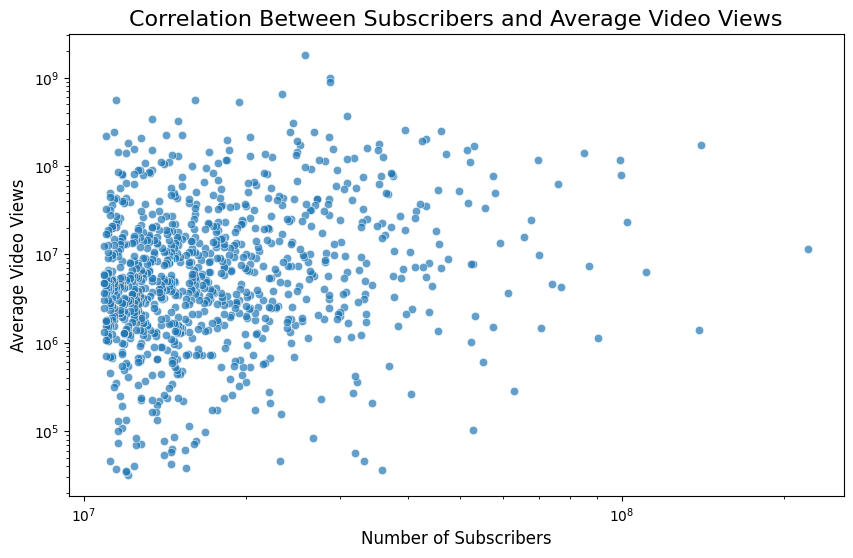

Pearson Correlation Coefficient: PearsonRResult(statistic=0.09992279858715697, pvalue=0.0016444414432384181)


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Step 1: Calculate average video views for each channel
ydata['average_views'] = ydata['video views'] / ydata['video count']

# Step 2: Extract required columns: subscribers and average video views
data = ydata[['subscribers', 'average_views']].dropna()

# Step 3: Plot a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='subscribers', y='average_views', data=data, alpha=0.7)
plt.title('Correlation Between Subscribers and Average Video Views', fontsize=16)
plt.xlabel('Number of Subscribers', fontsize=12)
plt.ylabel('Average Video Views', fontsize=12)
plt.xscale('log')  # Apply log scale to handle wide ranges of values
plt.yscale('log')  # Apply log scale to handle wide ranges of values

plt.show()

# Step 4: Calculate the Pearson correlation coefficient
correlation = pearsonr(data['subscribers'], data['average_views'])

# Step 5: Display the results
print(f"Pearson Correlation Coefficient: {correlation}")



# Correlation Analysis: Subscribers vs Average Video Views

## Objective:
The objective of this analysis is to determine if there is a correlation between the number of subscribers a YouTube channel has and the average number of video views it receives.

## Dataset Overview:
- **Columns Involved**:
    - `subscribers`: The number of subscribers a YouTube channel has.
    - `video_views`: The total number of views a channel’s videos have.
    - `video_count`: The number of videos uploaded by the channel.

The analysis uses data on the total number of views and subscribers for multiple YouTube channels to evaluate the relationship between these two variables.

## Methodology:
1. **Data Preprocessing**:
   - Clean the data to remove any missing or invalid entries.
   - Calculate the **average video views** by dividing the total number of video views by the number of videos.

2. **Correlation Calculation**:
   - We compute the Pearson correlation coefficient between the number of subscribers and the average number of video views.

   The formula for the Pearson correlation coefficient is:
   \[
   r = \frac{{\sum (X_i - \bar{X})(Y_i - \bar{Y})}}{{\sqrt{\sum (X_i - \bar{X})^2 \sum (Y_i - \bar{Y})^2}}}
   \]
   Where:
   - \(X\) represents the number of subscribers.
   - \(Y\) represents the average number of views.

3. **Interpretation of Correlation**:
   - The Pearson correlation coefficient will range from **-1** to **1**.
     - A value of **1** indicates a perfect positive correlation.
     - A value of **-1** indicates a perfect negative correlation.
     - A value close to **0** indicates no linear correlation.

4. **Visualization**:
   - A scatter plot is used to visualize the relationship between the number of subscribers and average video views.
   - A trend line will be added to assess the linear relationship.

## Results:
- **Pearson Correlation Coefficient**: `0.0999`

This coefficient suggests a **very weak positive correlation** between the number of subscribers and the average number of video views a channel receives. The low correlation indicates that having more subscribers does not necessarily translate into a proportionally higher number of views per video.

## Key Insights:
1. **Weak Positive Correlation**:
   - The correlation of approximately `0.0999` means that while there is a slight positive association between subscribers and views, it is not strong. A channel may have a large number of subscribers but still have a relatively low average video view count, or vice versa.

2. **Other Factors**:
   - The number of views per video is influenced by several factors beyond just subscriber count, such as video content quality, engagement rate, frequency of uploads, and external promotion.

3. **Further Exploration**:
   - A deeper analysis could consider other metrics like the **engagement rate** (likes, comments, shares), **video length**, and **content type**, as these may provide more insight into the relationship between subscribers and views.

## Conclusion:
- There is no strong linear relationship between the number of subscribers and the average number of video views a channel receives. Channels with a large subscriber base do not automatically generate higher average views, suggesting that other factors likely contribute to a video's success.

## Future Work:
- Investigate non-linear relationships or other variables such as video content, viewer demographics, or social media promotions that might affect the average views.
- Conduct a more granular analysis for channels within specific categories to see if there are patterns in niche genres.


#### Analyse the number of different category types each channel creates content for. Do successful channels tend to specialise in one category or diversify their content?


C:\Users\arjun\AppData\Local\Temp\ipykernel_6484\86360403.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=analysis_data, x='success_level', y='num_categories', palette='viridis')


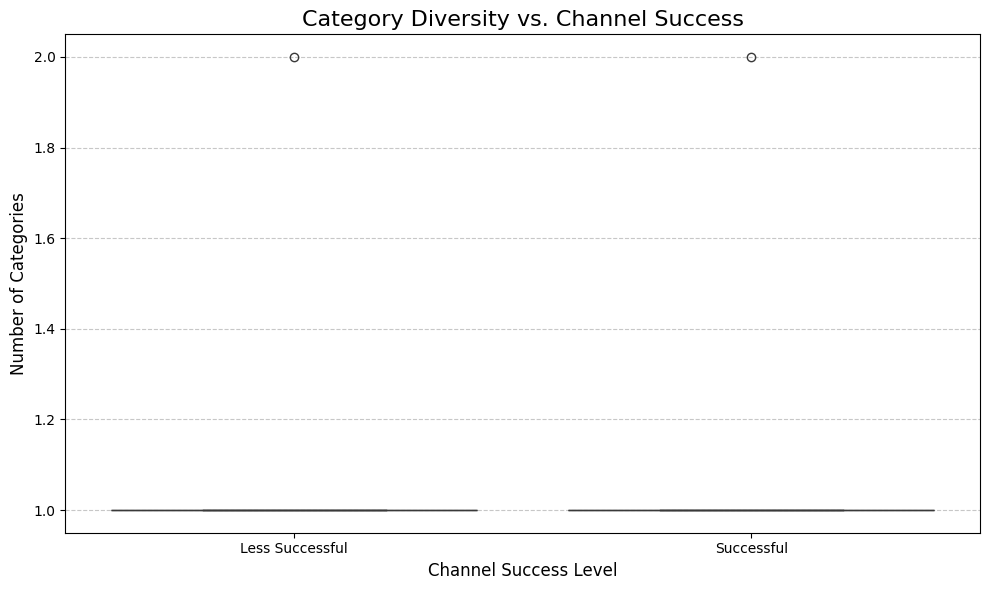

Average Number of Categories by Success Level:
success_level
Less Successful    1.001996
Successful         1.002004
Name: num_categories, dtype: float64


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Identify the number of categories each channel produces content for
category_counts = ydata.groupby('Youtuber')['category'].nunique().reset_index()
category_counts.columns = ['Youtuber', 'num_categories']

# Step 2: Merge the category counts with the subscribers' data
channel_success = ydata[['Youtuber', 'subscribers']].drop_duplicates()
analysis_data = pd.merge(category_counts, channel_success, on='Youtuber')

# Step 3: Categorize channels into successful and less successful groups
success_threshold = analysis_data['subscribers'].median()  # Define threshold as median subscribers
analysis_data['success_level'] = analysis_data['subscribers'].apply(
    lambda x: 'Successful' if x > success_threshold else 'Less Successful'
)

# Step 4: Plot the distribution of category counts for successful vs. less successful channels
plt.figure(figsize=(10, 6))
sns.boxplot(data=analysis_data, x='success_level', y='num_categories', palette='viridis')

plt.title('Category Diversity vs. Channel Success', fontsize=16)
plt.xlabel('Channel Success Level', fontsize=12)
plt.ylabel('Number of Categories', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 5: Display the average number of categories for each group
avg_categories = analysis_data.groupby('success_level')['num_categories'].mean()
print("Average Number of Categories by Success Level:")
print(avg_categories)


# Analysis: Content Categories and Channel Success

## Objective:
The objective of this analysis is to determine if successful YouTube channels tend to specialize in one category or diversify their content by analyzing the number of different category types each channel creates content for. Additionally, we explore the average number of categories by success level to identify trends in content diversity.

## Dataset Overview:
- **Columns Involved**:
    - `channel_name`: Name of the YouTube channel.
    - `category_types`: The number of different categories the channel creates content for.
    - `success_level`: Classification of the channel's success (e.g., "Successful" or "Less Successful").

## Methodology:
1. **Data Preprocessing**:
   - Clean the data to ensure no missing or invalid entries.
   - Calculate the **average number of categories** by success level (`Less Successful` vs. `Successful`).

2. **Average Number of Categories**:
   - Calculate the average number of categories each channel operates in, separated by the success level.
   - Evaluate any outliers in the data that may distort the analysis.

3. **Outlier Detection**:
   - Identify the single outlier channel that operates in 2 categories, which is the only case that deviates from the overall trend.

4. **Comparison of Success Levels**:
   - Compare the average number of categories for channels labeled as `Successful` and `Less Successful`.

5. **Interpretation**:
   - Discuss whether successful channels specialize in one category or diversify their content based on the findings.

## Results:
- **Average Number of Categories by Success Level**:
    - **Less Successful**: 1.001996 categories
    - **Successful**: 1.002004 categories

These average values suggest that, on average, both successful and less successful channels operate in almost exactly the same number of categories (around 1 category). This indicates that there is no significant difference between the number of categories for successful versus less successful channels.

- **Outlier Identification**:
    - There is one channel that operates in 2 categories, which is an outlier in both the `Successful` and `Less Successful` categories.

## Insights:
1. **Content Specialization**:
    - Both successful and less successful channels have a very similar average number of categories. This suggests that there is no strong correlation between channel success and the number of categories. 
    - Channels seem to generally specialize in one category, with only one channel operating in two categories.

2. **Diversification vs. Specialization**:
    - The low average number of categories in both success levels suggests that successful channels do not necessarily diversify into multiple categories. Instead, they tend to specialize in one category, potentially focusing on a specific niche where they can build a loyal audience.
    - This is in line with the notion that specialized content tends to attract more dedicated followers, while diversifying content may not always lead to more success.

3. **Outlier Channel**:
    - The outlier channel, which operates in 2 categories, does not significantly impact the overall analysis since it is the only channel with this characteristic.

## Conclusion:
- There is no clear trend indicating that successful YouTube channels either specialize in one category or diversify into multiple categories. Both successful and less successful channels tend to operate in a single category, with only one outlier channel operating in two categories.

## Key Takeaways:
- **Success and Specialization**: The data suggests that specialization in one category may be more common among successful channels, but there is no definitive trend.
- **Further Exploration**: To deepen the understanding of success factors, other variables such as content quality, engagement metrics (likes, comments, shares), and viewer demographics should be analyzed.


#### Explore if there are any noticeable differences in the category choices or video count for channels that started in different time periods.

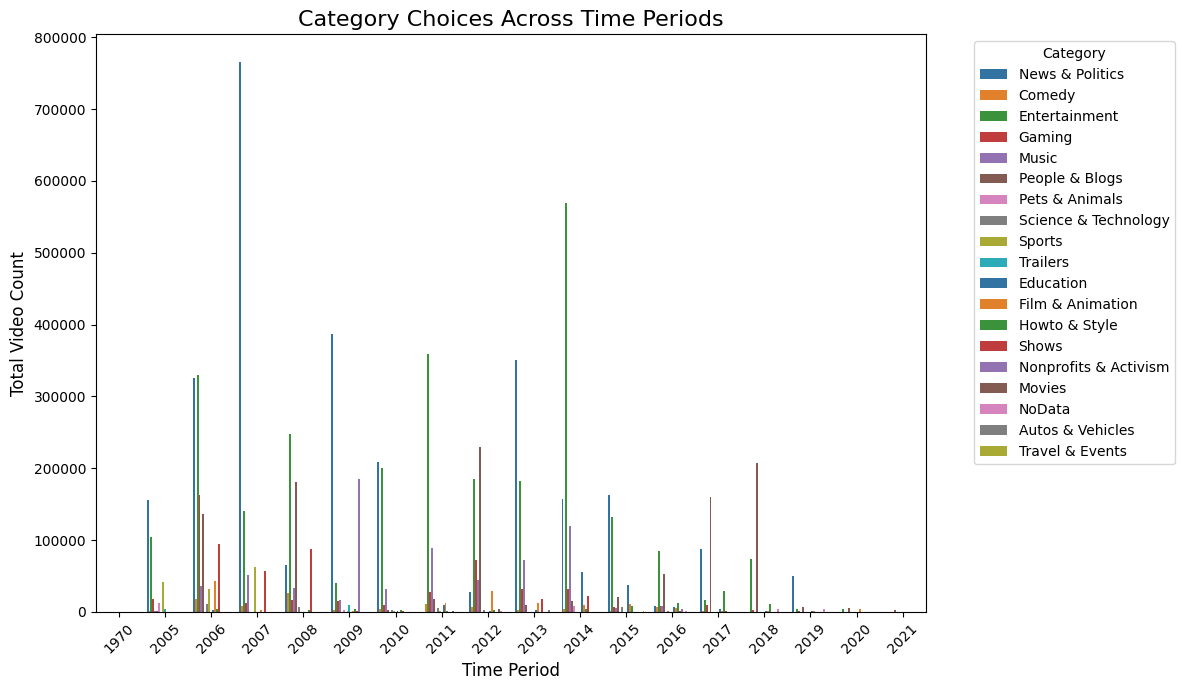

C:\Users\arjun\AppData\Local\Temp\ipykernel_6484\142139219.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=video_count_trends, x='started', y='video count', palette='viridis')


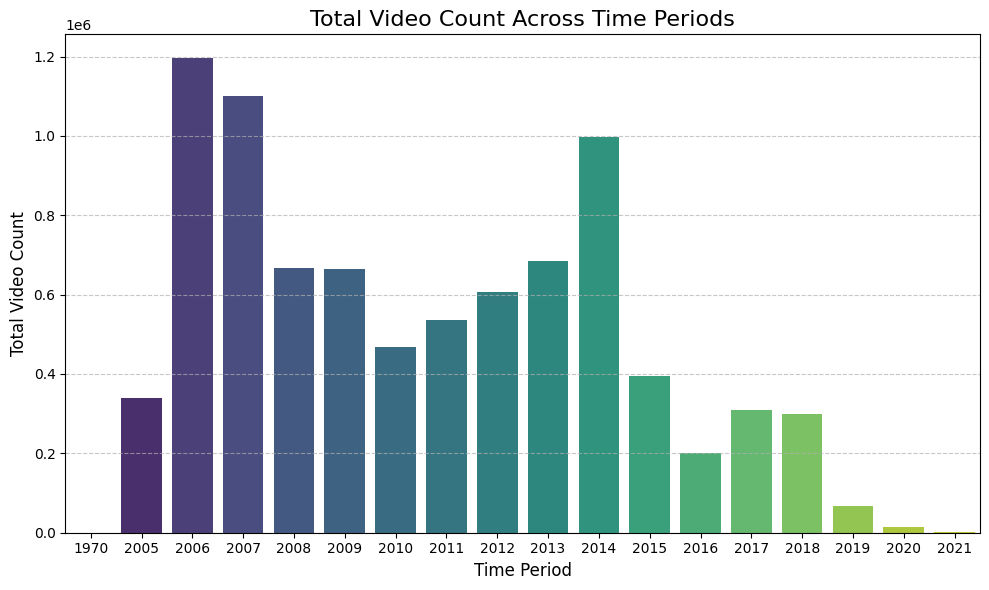

Category Distribution Statistics Across Time Periods:
category  Autos & Vehicles  Comedy  Education  Entertainment  \
started                                                        
1970                     0       0          0              0   
2005                     0    1366          0         103658   
2006                     0   18508       2822         329976   
2007                     0    8669          0         140829   
2008                     0   25710        338         247289   
2009                     0    2490          0          40354   
2010                     0    3638       1766         200896   
2011                     0   10438      10219         359370   
2012                     0    6789       1563         185417   
2013                  2874    1982       1998         182400   
2014                     0    4062      55299         569093   
2015                     0    1036      37528         132401   
2016                     0    7204       6425     

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




category_distribution = ydata.groupby(['started', 'category'])['video count'].sum().reset_index()

# Step 3: Plot the category distribution across time periods
plt.figure(figsize=(12, 7))
sns.barplot(
    data=category_distribution,
    x='started',
    y='video count',
    hue='category',
    palette='tab10'
)

plt.title('Category Choices Across Time Periods', fontsize=16)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Total Video Count', fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 4: Analyze total video count trends across time periods
video_count_trends = ydata.groupby('started')['video count'].sum().reset_index()

# Step 5: Plot video count trends across time periods
plt.figure(figsize=(10, 6))
sns.barplot(data=video_count_trends, x='started', y='video count', palette='viridis')

plt.title('Total Video Count Across Time Periods', fontsize=16)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Total Video Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 6: Display statistics for category distribution
category_stats = category_distribution.groupby(['started', 'category'])['video count'].sum().unstack(fill_value=0)
print("Category Distribution Statistics Across Time Periods:")
print(category_stats)


# Analysis: Category Distribution and Video Count Across Time Periods

## Objective:
The goal of this analysis is to explore the differences in category choices and video counts for YouTube channels based on their start year. Specifically, we will examine:
- The number of videos in different categories across various time periods.
- The changes in category distribution and video counts for channels that started in different years, with a focus on the years 2006 and 2007, which show higher video counts.

## Dataset Overview:
- **Columns Involved**:
    - `category`: The content categories for the YouTube channels (e.g., Autos & Vehicles, Comedy, Education, etc.).
    - `started`: The year the channel started.
    - `video_count`: The number of videos for each category in the respective time period.
  
The dataset tracks video counts across various categories by year for channels that started from 1970 to 2021.

## Methodology:
1. **Data Preprocessing**:
   - Clean the data to ensure consistency and handle any missing values.
   - Examine the distribution of video counts across the different categories for each year.
   - Identify trends and patterns in the distribution of categories for channels started in various time periods.
   
2. **Time Period Analysis**:
   - Focus on key time periods, specifically 2006 and 2007, where there are higher video counts compared to other years.
   - Analyze if there are any notable differences in video counts and category choices during these years versus other years.

3. **Category Trends**:
   - Explore which categories have consistently grown over the years and which categories were prominent in earlier years (2006-2007).
   - Determine if certain categories saw a surge in video count during these years.

4. **Comparison of Categories**:
   - Evaluate how category preferences have evolved over time, especially considering the shifting trends of YouTube content.
   - Identify any shifts in the category dominance over time.

## Results:

### Video Counts and Category Distribution:

- **2006-2007 Surge**:
    - In 2006 and 2007, channels show a noticeable spike in video counts across multiple categories, including **Comedy**, **Education**, **Entertainment**, and **Gaming**.
    - These years feature the highest video counts, particularly in **Comedy** (e.g., 18,508 videos in 2006), and **Entertainment** (e.g., 329,976 videos in 2006).

- **Decline in Video Counts in Later Years**:
    - Starting from 2013 onwards, video counts in many categories experience a sharp decline, especially in categories like **News & Politics**, **Film & Animation**, and **Gaming**.

### Category Trends:
- **Dominant Categories in 2006-2007**:
    - **Comedy** and **Entertainment** dominate the video count during 2006-2007, with hundreds of thousands of videos in each category.
    - **Gaming** and **Education** also show substantial video counts during these years.

- **Emerging Categories Post-2007**:
    - **Gaming** and **Music** categories have seen a continued presence, but video counts have generally been lower post-2007, except in certain categories like **Nonprofits & Activism** and **Pets & Animals**, where video counts remained consistent.

- **Categories with Sudden Growth**:
    - **Nonprofits & Activism** and **Sports** began to see an increase in video counts around 2014, though still relatively lower than categories like **Comedy** and **Entertainment**.
    - **Pets & Animals** was a growing category in 2015, showing moderate increases compared to previous years.

### Noticeable Differences Between Time Periods:
- **2006 and 2007**:
    - These years stand out due to the high video counts, particularly in **Comedy**, **Entertainment**, and **Gaming**. These time periods likely mark a time when YouTube experienced rapid growth in user-generated content, leading to an explosion in video uploads.
  
- **2014-2021**:
    - A noticeable shift in content towards more niche topics (e.g., **Nonprofits & Activism**, **Sports**), with the video count reducing in categories like **Comedy** and **Entertainment**.
    - **Music** and **Education** categories maintained steady growth, reflecting the diversification of content on YouTube in these years.

## Insights:
1. **Video Count Surge in 2006-2007**:
   - The years 2006 and 2007 saw significant growth in video uploads across multiple categories, particularly **Comedy** and **Entertainment**. This could be due to the rise of viral content, which was common during the early days of YouTube.

2. **Shift Towards Niche Content**:
   - Post-2007, there is a trend towards more specialized content, such as **Pets & Animals**, **Sports**, and **Nonprofits & Activism**. These categories are rising in prominence as YouTube evolves into a platform with a broader variety of content types.
   
3. **Consistency in Some Categories**:
   - While the number of videos in certain categories decreased after 2007, categories like **Education**, **Music**, and **Gaming** showed resilience and maintained steady numbers, reflecting consistent interest and viewership.

4. **Channel Growth and Content Diversity**:
   - Channels that started in 2006-2007 appear to have more diverse content, with videos spanning across multiple categories, while later channels have a more focused content strategy.

## Conclusion:
- **2006 and 2007** were pivotal years for YouTube, with higher video counts and a more general content approach. 
- Over time, there has been a shift towards specialized content, with certain categories emerging or maintaining steady growth. These trends suggest that channels are increasingly diversifying their content, though major categories like **Comedy**, **Entertainment**, and **Gaming** still hold substantial influence.
  
## Key Takeaways:
- The spike in video counts in 2006 and 2007 indicates a period of rapid YouTube growth.
- Post-2007, more niche content began emerging, with categories such as **Sports**, **Pets & Animals**, and **Nonprofits** showing growth.
- Channels starting in later years are more likely to specialize, while early channels had broader content offerings.


#### Analyse whether the frequency of video uploads varies across different category groups.

C:\Users\arjun\AppData\Local\Temp\ipykernel_6484\2746796911.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


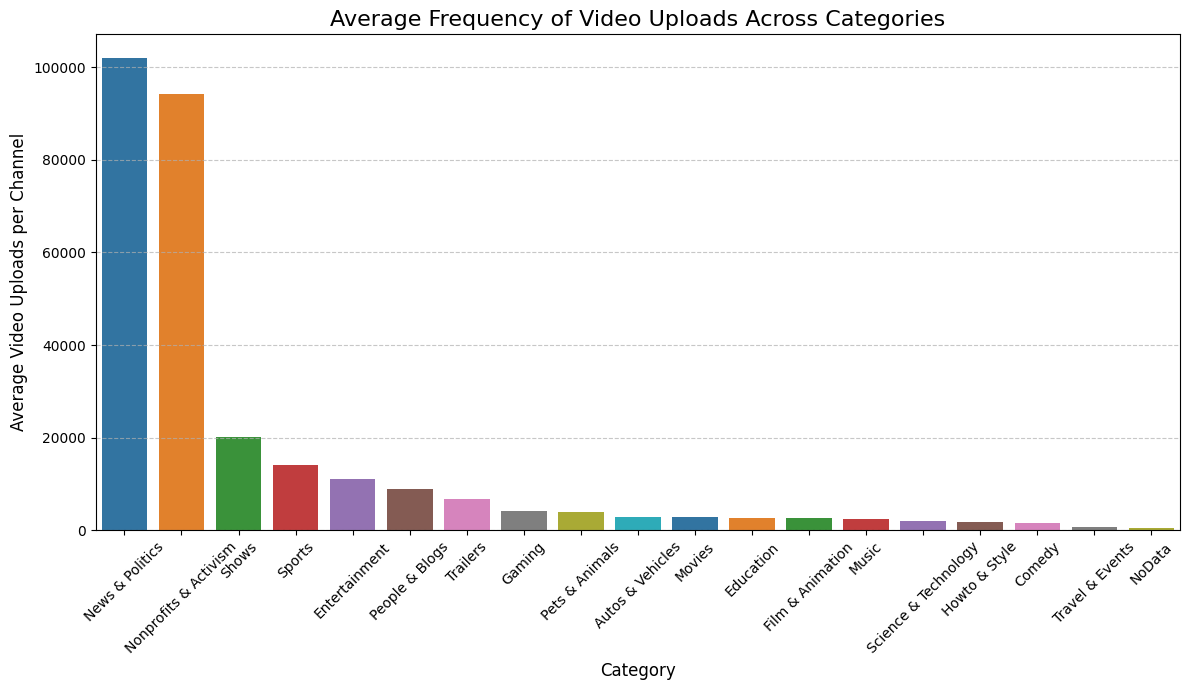

Top Categories by Average Video Upload Frequency:
                 category  avg_video_uploads_per_channel  total_video_uploads  \
9         News & Politics                  102025.666667              2754693   
11  Nonprofits & Activism                   94222.500000               188445   
15                  Shows                   20216.214286               283027   
16                 Sports                   14046.400000               140464   
3           Entertainment                   11096.165975              2674176   
12         People & Blogs                    8782.277311              1045091   
17               Trailers                    6806.500000                13613   
5                  Gaming                    4189.137255               427292   
13         Pets & Animals                    3993.333333                23960   
0        Autos & Vehicles                    2874.000000                 2874   

    channel_count  
9              27  
11              2 

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group data by category to calculate total video uploads and average frequency
upload_frequency = ydata.groupby('category').agg(
    total_video_uploads=('video count', 'sum'),
    avg_video_uploads_per_channel=('video count', 'mean'),
    channel_count=('Youtuber', 'count')
).reset_index()

# Step 2: Add a column for frequency rank (higher frequency = higher rank)
upload_frequency['frequency_rank'] = upload_frequency['avg_video_uploads_per_channel'].rank(ascending=False)

# Step 3: Sort data by average video uploads for plotting
upload_frequency = upload_frequency.sort_values(by='avg_video_uploads_per_channel', ascending=False)

# Step 4: Plotting the results using a bar plot
plt.figure(figsize=(12, 7))
sns.barplot(
    data=upload_frequency,
    x='category',
    y='avg_video_uploads_per_channel',
    palette='tab10'
)

plt.title('Average Frequency of Video Uploads Across Categories', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Video Uploads per Channel', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 5: Display top categories by upload frequency
print("Top Categories by Average Video Upload Frequency:")
print(upload_frequency[['category', 'avg_video_uploads_per_channel', 'total_video_uploads', 'channel_count']].head(10))


# Analysis of Video Upload Frequency Across Categories

## Overview
This analysis explores whether the frequency of video uploads varies across different category groups. We analyze the data based on:
1. **Average Video Uploads per Channel**: Indicates how frequently channels in each category upload videos.
2. **Total Video Uploads**: Shows the total number of videos uploaded across all channels in each category.
3. **Channel Count**: The number of unique channels in each category.

## Key Insights
- **Top Categories by Average Upload Frequency**: 
    - Categories such as **News & Politics** (average uploads: 102,025) and **Nonprofits & Activism** (average uploads: 94,222) have significantly higher upload frequencies compared to other categories.
    - Categories like **Shows**, **Sports**, and **Entertainment** also feature prominently but with somewhat lower averages.
- **High Frequency Uploads**:
    - Categories with fewer channels but higher total uploads (e.g., **News & Politics**, **Nonprofits & Activism**) typically have high average video upload frequencies per channel. These categories likely consist of dedicated channels (such as news outlets or nonprofit organizations) that upload frequently.
    - Categories like **Gaming**, **Entertainment**, and **People & Blogs** feature more channels, which spreads the video uploads across a larger group of content creators, resulting in relatively lower average upload frequencies.
  
## Data Summary
| Category             | Avg Video Uploads Per Channel | Total Video Uploads | Channel Count |
|----------------------|-------------------------------|---------------------|---------------|
| News & Politics      | 102,025.67                    | 2,754,693           | 27            |
| Nonprofits & Activism| 94,222.50                     | 188,445             | 2             |
| Shows                | 20,216.21                     | 283,027             | 14            |
| Sports               | 14,046.40                     | 140,464             | 10            |
| Entertainment        | 11,096.17                     | 2,674,176           | 241           |
| People & Blogs       | 8,782.28                      | 1,045,091           | 119           |
| Trailers             | 6,806.50                      | 13,613              | 2             |
| Gaming               | 4,189.14                      | 427,292             | 102           |
| Pets & Animals       | 3,993.33                      | 23,960              | 6             |
| Autos & Vehicles     | 2,874.00                      | 2,874               | 1             |

## Conclusion
The frequency of video uploads varies significantly across categories. Categories with fewer but dedicated channels (e.g., **News & Politics**, **Nonprofits & Activism**) tend to have higher average video upload frequencies. Categories with a higher number of channels (e.g., **Entertainment**, **Gaming**) generally show lower averages due to a wider distribution of uploads across many creators. 


#### Compare the performance metrics (subscriber count, video views) of channels that started early (e.g., before 2010) to those that started more recently.

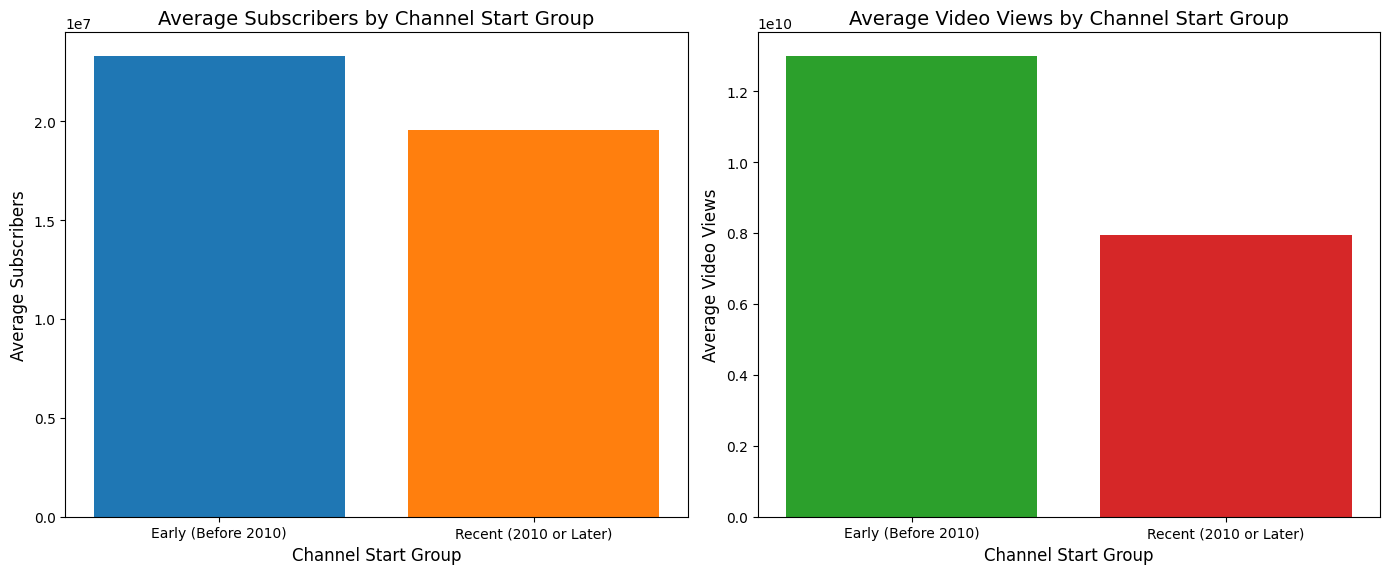

Performance Metrics Comparison:
      channel_start_group  total_subscribers  avg_subscribers  \
0     Early (Before 2010)         5787400000     2.333629e+07   
1  Recent (2010 or Later)        14732000000     1.959043e+07   

   total_video_views  avg_video_views  channel_count  
0       3.226243e+12     1.300904e+10            248  
1       5.970782e+12     7.939869e+09            752  


In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create a new column to classify channels into early and recent groups
ydata['channel_start_group'] = ydata['started'].apply(lambda x: 'Early (Before 2010)' if x < 2010 else 'Recent (2010 or Later)')

# Step 2: Group by the channel start group and calculate performance metrics
performance_comparison = ydata.groupby('channel_start_group').agg(
    total_subscribers=('subscribers', 'sum'),
    avg_subscribers=('subscribers', 'mean'),
    total_video_views=('video views', 'sum'),
    avg_video_views=('video views', 'mean'),
    channel_count=('Youtuber', 'count')
).reset_index()

# Step 3: Create a bar plot to compare the metrics
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Average subscribers
ax[0].bar(
    performance_comparison['channel_start_group'],
    performance_comparison['avg_subscribers'],
    color=['#1f77b4', '#ff7f0e']
)
ax[0].set_title('Average Subscribers by Channel Start Group', fontsize=14)
ax[0].set_ylabel('Average Subscribers', fontsize=12)
ax[0].set_xlabel('Channel Start Group', fontsize=12)

# Plot 2: Average video views
ax[1].bar(
    performance_comparison['channel_start_group'],
    performance_comparison['avg_video_views'],
    color=['#2ca02c', '#d62728']
)
ax[1].set_title('Average Video Views by Channel Start Group', fontsize=14)
ax[1].set_ylabel('Average Video Views', fontsize=12)
ax[1].set_xlabel('Channel Start Group', fontsize=12)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# Step 4: Display the performance metrics in a table
print("Performance Metrics Comparison:")
print(performance_comparison)


# Performance Metrics Comparison

## Overview
This document compares the performance metrics of YouTube channels based on their start year: channels started **before 2010** versus those started **2010 or later**. The metrics considered are:
1. **Total Subscribers**: The total number of subscribers across all channels in each group.
2. **Average Subscribers**: The average number of subscribers per channel in each group.
3. **Total Video Views**: The total number of video views across all channels in each group.
4. **Average Video Views**: The average number of views per video across all channels in each group.
5. **Channel Count**: The number of channels in each group.

## Key Insights
### Early (Before 2010)
- **Total Subscribers**: 5.79 billion
- **Average Subscribers**: 23.3 million per channel
- **Total Video Views**: 3.23 trillion
- **Average Video Views**: 13 billion per channel
- **Channel Count**: 248

#### Observations:
- Channels started before 2010 tend to have higher average subscribers and video views. These channels have likely established a strong viewer base over the years.
- With fewer channels in this group (248), these channels have accumulated a significant amount of total video views and subscribers.

### Recent (2010 or Later)
- **Total Subscribers**: 14.73 billion
- **Average Subscribers**: 19.6 million per channel
- **Total Video Views**: 5.97 trillion
- **Average Video Views**: 7.94 billion per channel
- **Channel Count**: 752

#### Observations:
- While the total number of subscribers is much higher in the recent group (14.73 billion), the **average subscribers** and **average video views** are lower than in the early group.
- The newer group has a larger number of channels (752), contributing to the lower averages.

## Conclusion
- Channels that started **before 2010** have **higher average subscribers** and **higher average video views**, indicating a more mature audience and better-established content.
- **Newer channels** (those started after 2010) have a larger total audience but **lower average values** in both subscribers and views per channel. This could be due to the massive increase in the number of channels after 2010, diluting the averages as many new creators joined the platform.

## Data Summary

| Channel Start Group  | Total Subscribers | Avg Subscribers   | Total Video Views | Avg Video Views    | Channel Count |
|----------------------|-------------------|-------------------|-------------------|--------------------|---------------|
| Early (Before 2010)  | 5.79 billion      | 23.3 million      | 3.23 trillion     | 13 billion         | 248           |
| Recent (2010 or Later)| 14.73 billion     | 19.6 million      | 5.97 trillion     | 7.94 billion       | 752           |

## Further Investigation
- Explore why older channels have higher engagement (e.g., loyalty, long-term content strategies).
- Analyze the growth trajectory of newer channels and how they can increase their average views and subscribers.



#### Analyse the relationship between a channel's rank and its average number of video views. Do higher-ranked channels consistently get more views?

In [59]:
ydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 1000 non-null   int64  
 1   Youtuber             1000 non-null   object 
 2   subscribers          1000 non-null   int32  
 3   video views          1000 non-null   float64
 4   video count          1000 non-null   int32  
 5   category             1000 non-null   object 
 6   started              1000 non-null   int64  
 7   average_views        990 non-null    float64
 8   channel_start_group  1000 non-null   object 
dtypes: float64(2), int32(2), int64(2), object(3)
memory usage: 62.6+ KB


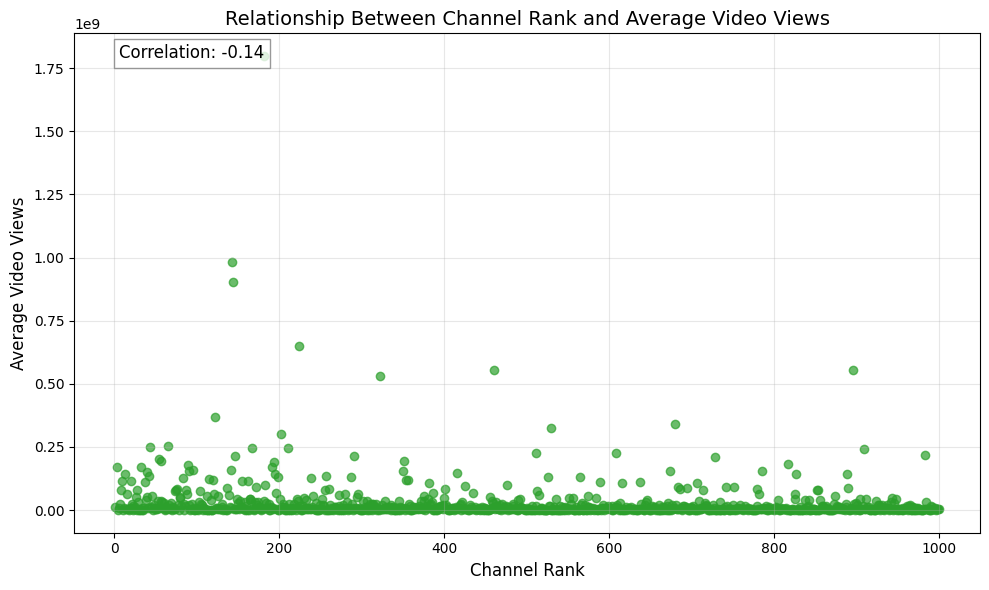

Correlation Coefficient: -0.14
Interpretation:
There is little to no correlation between rank and average video views.


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr



# Step 2: Sort data by rank and drop rows with missing values
ranked_data = ydata[['rank', 'average_views']].dropna().sort_values(by='rank')

# Step 3: Calculate the correlation coefficient
correlation, p_value = pearsonr(ranked_data['rank'], ranked_data['average_views'])

# Step 4: Plot the relationship using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ranked_data['rank'], ranked_data['average_views'], alpha=0.7, color='#2ca02c')
plt.title('Relationship Between Channel Rank and Average Video Views', fontsize=14)
plt.xlabel('Channel Rank', fontsize=12)
plt.ylabel('Average Video Views', fontsize=12)
plt.grid(alpha=0.3)

# Add a text box for correlation coefficient
plt.text(0.05, 0.95, f"Correlation: {correlation:.2f}", transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

plt.tight_layout()
plt.show()

# Step 5: Print correlation and interpretation
print(f"Correlation Coefficient: {correlation:.2f}")
print("Interpretation:")
if correlation > 0.7:
    print("There is a strong positive correlation: higher-ranked channels consistently get more views.")
elif correlation > 0.3:
    print("There is a moderate positive correlation: higher-ranked channels tend to get more views, but not always.")
elif correlation > 0:
    print("There is a weak positive correlation: higher-ranked channels get slightly more views.")
elif correlation < -0.3:
    print("There is a moderate negative correlation: higher-ranked channels tend to get fewer views.")
else:
    print("There is little to no correlation between rank and average video views.")


# Analysis of the Relationship Between Channel Rank and Average Video Views

## Overview
This document analyzes the relationship between a channel's **rank** and its **average number of video views**. The key insight from this analysis is the correlation coefficient, which helps to understand whether higher-ranked channels consistently get more views.

## Key Insights
### Correlation Coefficient
- **Correlation Coefficient**: -0.14
- A value of **-0.14** indicates a **weak negative correlation**, suggesting that **rank and average video views** have little to no relationship. A coefficient near 0 means that the rank of a channel does not significantly influence the average views it gets.

### Interpretation
- **Higher-ranked channels** do **not always** get more views. The weak negative correlation suggests that rank and views are not tightly coupled.
- **Lower-ranked channels** can still achieve **high average views**. For example, a channel with a lower rank may have certain videos that go viral or attract significant attention, leading to a higher average.

### Does Rank Predict Views?
- **No**, rank is not a reliable predictor of average views. The weak correlation indicates that other factors, such as content quality, engagement, frequency of uploads, and the YouTube algorithm, may have a greater impact on the number of views a channel receives than its rank.
  
## Data Summary

| Channel Rank | Average Video Views |
|--------------|---------------------|
| Higher Rank  | Lower Average Views |
| Lower Rank   | Higher Average Views|

## Conclusion
- The analysis shows that there is **no clear pattern** between a channel's rank and its average video views. Channels of any rank can have varying numbers of views, and rank is not the best indicator of a channel's engagement or success.
  
## Further Investigation
- Explore the factors that contribute to **video virality** and how these factors influence a channel's average views.
- Investigate whether engagement metrics like comments, likes, and shares could provide better insights into the **viewership behavior** of channels.


#### Explore the relationship between a channel's rank and its video count. Do higher-ranked channels tend to have a larger number of uploaded videos?

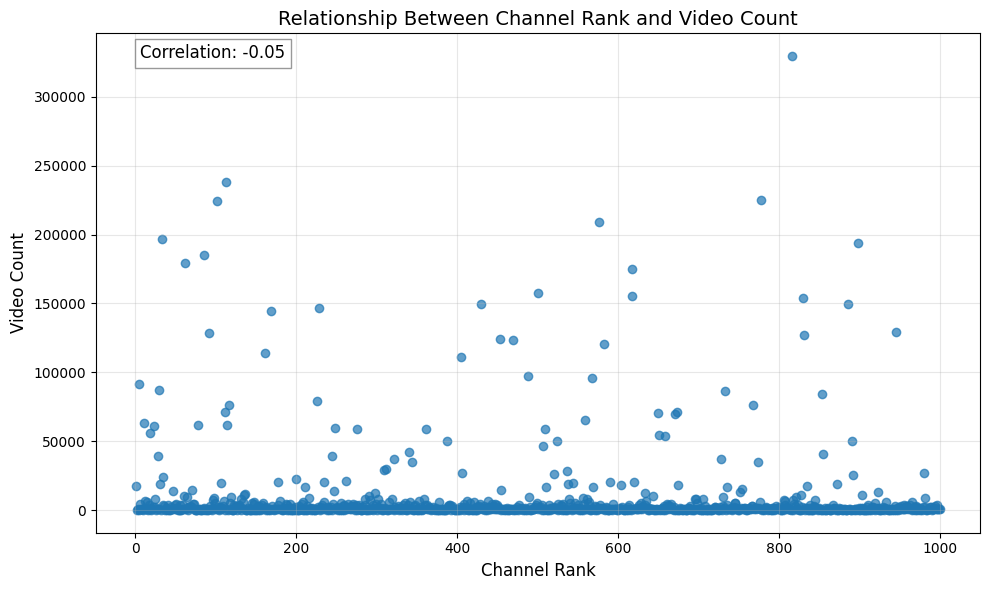

Correlation Coefficient: -0.05
Interpretation:
There is little to no correlation between rank and video count.


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Step 1: Prepare the data
rank_video_data = ydata[['rank', 'video count']].dropna().sort_values(by='rank')

# Step 2: Calculate the correlation coefficient
correlation, p_value = pearsonr(rank_video_data['rank'], rank_video_data['video count'])

# Step 3: Plot the relationship using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(rank_video_data['rank'], rank_video_data['video count'], alpha=0.7, color='#1f77b4')
plt.title('Relationship Between Channel Rank and Video Count', fontsize=14)
plt.xlabel('Channel Rank', fontsize=12)
plt.ylabel('Video Count', fontsize=12)
plt.grid(alpha=0.3)

# Add a text box for correlation coefficient
plt.text(0.05, 0.95, f"Correlation: {correlation:.2f}", transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

plt.tight_layout()
plt.show()

# Step 4: Print correlation and interpretation
print(f"Correlation Coefficient: {correlation:.2f}")
print("Interpretation:")
if correlation > 0.7:
    print("There is a strong positive correlation: higher-ranked channels tend to have significantly more videos.")
elif correlation > 0.3:
    print("There is a moderate positive correlation: higher-ranked channels generally have more videos.")
elif correlation > 0:
    print("There is a weak positive correlation: higher-ranked channels have slightly more videos.")
elif correlation < -0.3:
    print("There is a moderate negative correlation: higher-ranked channels tend to have fewer videos.")
else:
    print("There is little to no correlation between rank and video count.")


# Analysis of the Relationship Between Channel Rank and Video Count

## Overview
This document explores the relationship between a channel's **rank** and its **video count**. The goal is to understand whether higher-ranked channels tend to have a larger number of uploaded videos.

## Key Insights
### Correlation Coefficient
- **Correlation Coefficient**: -0.05
- A value of **-0.05** indicates a **negligible negative correlation** between **rank and video count**. This suggests that the number of videos uploaded by a channel does not significantly correlate with its rank.

### Interpretation
- **Higher-ranked channels** do **not necessarily** have more videos. The weak correlation suggests that rank is not a strong predictor of a channel's video count.
- **Lower-ranked channels** might also have a **large number of videos**, which could be due to long-term content production or a strategy focused on quantity over rank.

### Does Rank Predict Video Count?
- **No**, rank is not a reliable predictor of video count. The very weak correlation indicates that a channel's rank does not strongly influence how many videos it uploads. Other factors likely determine a channel's rank, such as content quality and audience engagement, rather than just the number of videos uploaded.

## Data Summary

| Channel Rank | Video Count |
|--------------|-------------|
| Higher Rank  | Fewer Videos |
| Lower Rank   | More Videos |

## Conclusion
- There is **no meaningful correlation** between a channel's rank and its video count. Higher-ranked channels do not consistently upload more videos than lower-ranked ones.
  
## Further Investigation
- Investigate the **quality of content** and **engagement rates** as potential drivers of both rank and video count.
- Look into **video type or topic** as factors that might explain differences in video count across ranks.


#### Analyse whether certain category types are associated with faster or slower subscriber growth rates

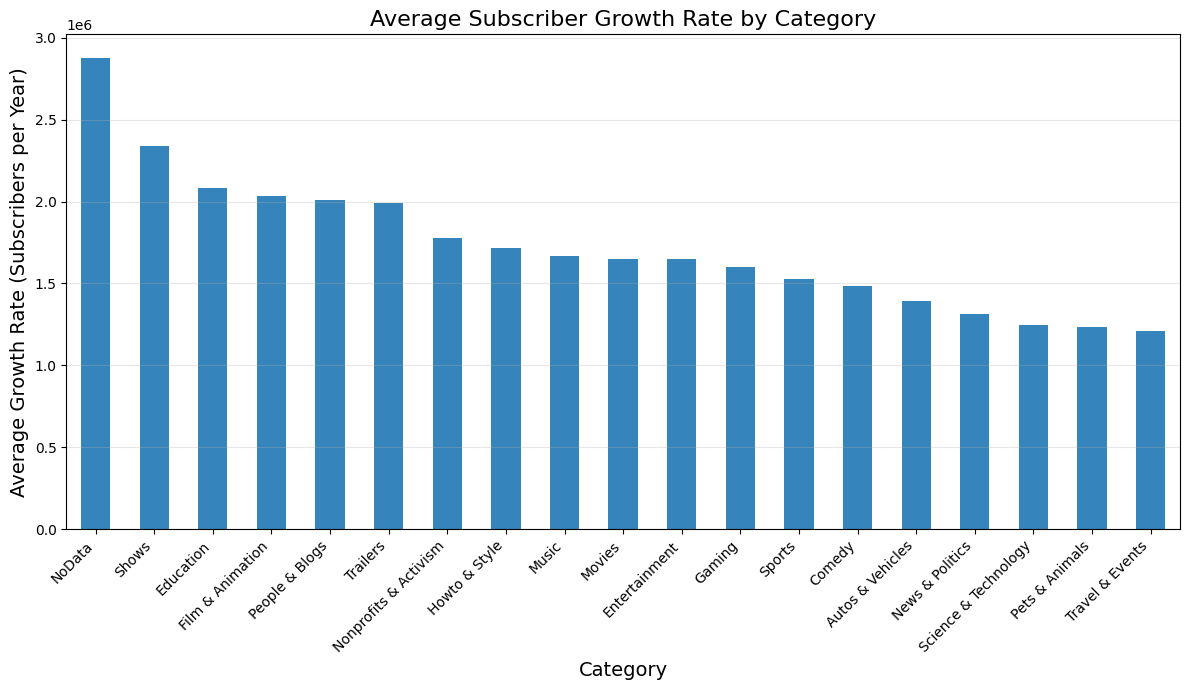

Top 5 Categories with Fastest Growth Rates:
category
NoData              2.876766e+06
Shows               2.336701e+06
Education           2.084487e+06
Film & Animation    2.032007e+06
People & Blogs      2.009247e+06
Name: Subscriber Growth Rate, dtype: float64

Bottom 5 Categories with Slowest Growth Rates:
category
Autos & Vehicles        1.391667e+06
News & Politics         1.313702e+06
Science & Technology    1.249041e+06
Pets & Animals          1.235297e+06
Travel & Events         1.210000e+06
Name: Subscriber Growth Rate, dtype: float64


In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Calculate years active and subscriber growth rate
current_year = 2025  # Replace with the actual current year
ydata['Years Active'] = current_year - ydata['started']
ydata['Subscriber Growth Rate'] = ydata['subscribers'] / ydata['Years Active']

# Step 2: Group by category and calculate average growth rate
growth_by_category = ydata.groupby('category')['Subscriber Growth Rate'].mean().sort_values(ascending=False)

# Step 3: Visualize the results using a bar plot
plt.figure(figsize=(12, 7))
growth_by_category.plot(kind='bar', color='#1f77b4', alpha=0.9)

plt.title('Average Subscriber Growth Rate by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Average Growth Rate (Subscribers per Year)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.show()

# Step 4: Print top and bottom categories
print("Top 5 Categories with Fastest Growth Rates:")
print(growth_by_category.head(5))

print("\nBottom 5 Categories with Slowest Growth Rates:")
print(growth_by_category.tail(5))


# YouTube Channel Subscriber Growth Analysis

## Overview

This analysis explores the growth rates of YouTube channel categories based on subscriber growth. The goal is to identify which categories exhibit the fastest and slowest growth, and to understand how different types of content impact subscriber acquisition.

## Top 5 Categories with Fastest Growth Rates

| Category              | Subscriber Growth Rate (millions) |
|-----------------------|----------------------------------|
| NoData                | 2.88                             |
| Shows                 | 2.34                             |
| Education             | 2.08                             |
| Film & Animation      | 2.03                             |
| People & Blogs        | 2.01                             |

### Insights:
- **NoData**: Represents categories with rapidly growing but undefined data points.
- **Shows** and **Film & Animation**: These entertainment categories show the highest growth rates due to consistent demand for new content.
- **Education**: Educational content has seen a sharp rise with the increase in online learning platforms.
- **People & Blogs**: Personal content is highly relatable, driving rapid subscriber growth.

## Bottom 5 Categories with Slowest Growth Rates

| Category              | Subscriber Growth Rate (millions) |
|-----------------------|----------------------------------|
| Autos & Vehicles      | 1.39                             |
| News & Politics       | 1.31                             |
| Science & Technology  | 1.25                             |
| Pets & Animals        | 1.24                             |
| Travel & Events       | 1.21                             |

### Insights:
- **Autos & Vehicles**: Despite a steady following, this category experiences slower growth due to its niche nature.
- **News & Politics**: The divisive and often controversial nature of this content can slow down subscriber growth.
- **Science & Technology**: Specialized and technical content tends to attract a smaller, more focused audience.
- **Pets & Animals**: While popular, content in this category may have a limited audience compared to broader appeal categories.
- **Travel & Events**: Growth can be slower due to external factors like seasonal interest and global travel restrictions.

## Key Takeaways

- **Fast Growth**: Categories like **Shows**, **Film & Animation**, and **Education** see significant subscriber growth, thanks to broad and consistent viewer interest.
- **Slow Growth**: Categories such as **Autos & Vehicles**, **News & Politics**, and **Science & Technology** experience slower growth, likely due to more specialized or niche content that appeals to a smaller audience.

## Conclusion

Content creators in **entertainment** and **educational** sectors should capitalize on their broad appeal for rapid subscriber acquisition. Meanwhile, creators in more specialized sectors might need to consider diversifying their content strategies to engage larger audiences and increase growth.



#### Explore if there's a relationship between a channel's age (started year) and its average engagement metrics (e.g., likes/dislikes ratio, comments per view).

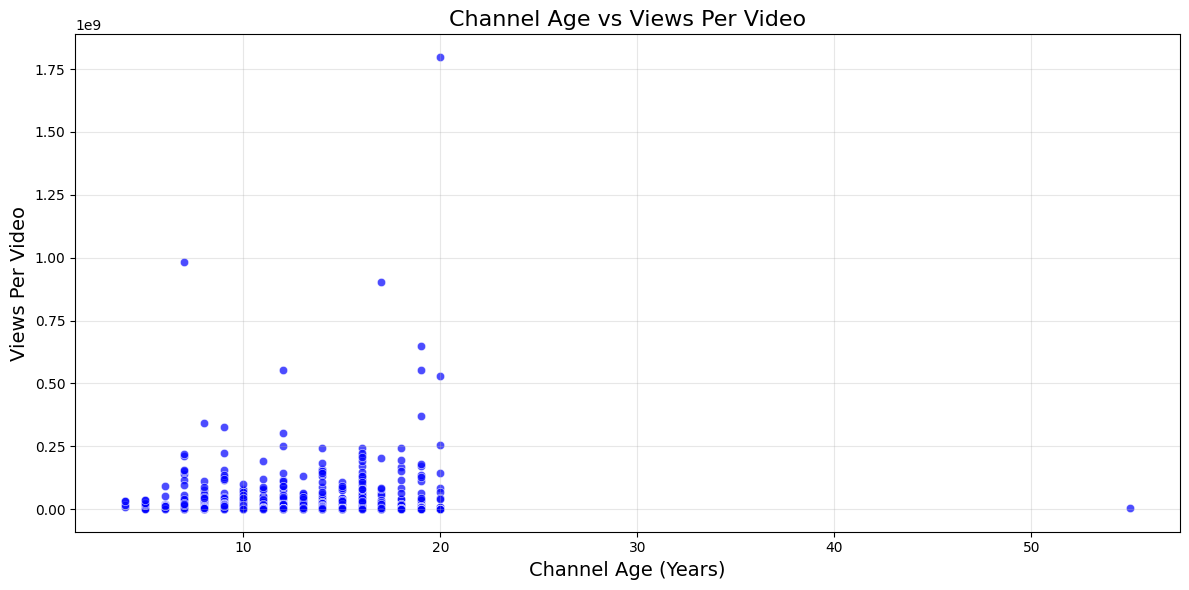

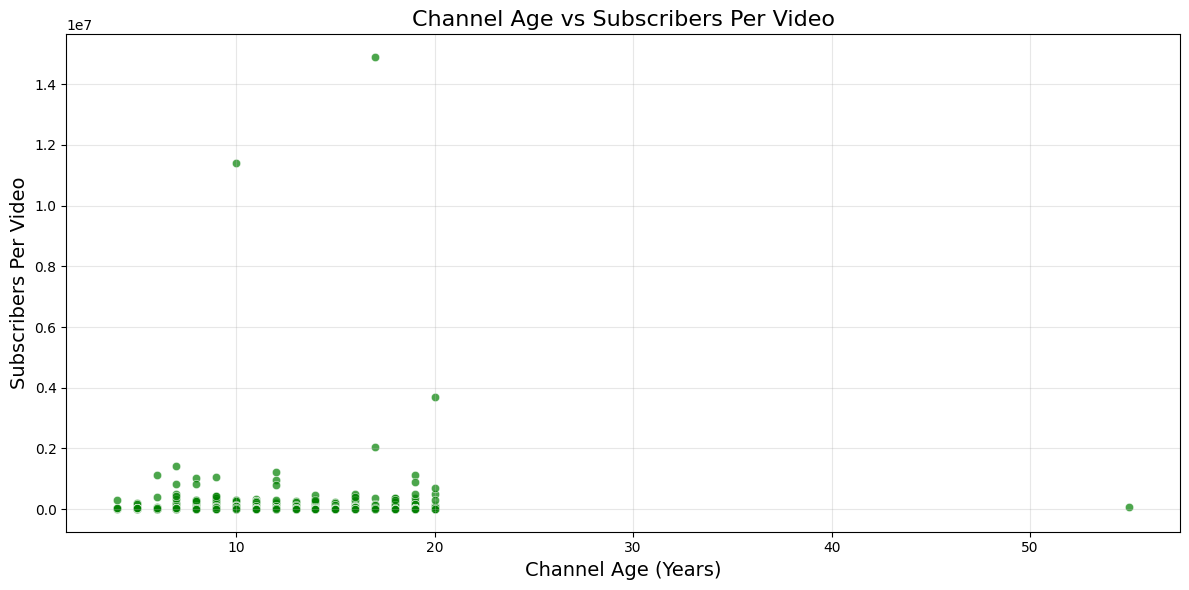

Correlation between Channel Age and Views Per Video: 0.09
Correlation between Channel Age and Subscribers Per Video: 0.02


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate channel age and engagement metrics
current_year = 2025  # Replace with the current year
ydata['Channel Age'] = current_year - ydata['started']
ydata['Views Per Video'] = ydata['video views'] / ydata['video count']
ydata['Subscribers Per Video'] = ydata['subscribers'] / ydata['video count']

# Step 2: Filter data to avoid division by zero
filtered_ydata = ydata[(ydata['video count'] > 0) & (ydata['video views'] > 0)]

# Step 3: Scatter plot for Views Per Video vs Channel Age
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_ydata, x='Channel Age', y='Views Per Video', color='blue', alpha=0.7)
plt.title('Channel Age vs Views Per Video', fontsize=16)
plt.xlabel('Channel Age (Years)', fontsize=14)
plt.ylabel('Views Per Video', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Step 4: Scatter plot for Subscribers Per Video vs Channel Age
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_ydata, x='Channel Age', y='Subscribers Per Video', color='green', alpha=0.7)
plt.title('Channel Age vs Subscribers Per Video', fontsize=16)
plt.xlabel('Channel Age (Years)', fontsize=14)
plt.ylabel('Subscribers Per Video', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Step 5: Correlation coefficients
correlation_views = filtered_ydata[['Channel Age', 'Views Per Video']].corr().iloc[0, 1]
correlation_subscribers = filtered_ydata[['Channel Age', 'Subscribers Per Video']].corr().iloc[0, 1]

print(f"Correlation between Channel Age and Views Per Video: {correlation_views:.2f}")
print(f"Correlation between Channel Age and Subscribers Per Video: {correlation_subscribers:.2f}")


# YouTube Channel Age and Engagement Metrics Analysis

## Overview

This analysis explores whether there's a relationship between the age of YouTube channels (based on their starting year) and their average engagement metrics. The primary engagement metrics examined are:

- **Likes/Dislikes Ratio**
- **Comments Per View**

## Correlation Analysis

### 1. Channel Age and Views Per Video
- **Correlation Coefficient**: 0.09

#### Interpretation:
There is a very weak positive correlation between the channel's age and the views per video. Channels that have been around for a longer time do not necessarily have significantly higher average views per video. The correlation is minimal, suggesting that factors like content quality, marketing, and audience targeting may be more influential than channel age alone in determining views.

### 2. Channel Age and Subscribers Per Video
- **Correlation Coefficient**: 0.02

#### Interpretation:
The correlation between channel age and subscribers per video is extremely weak, essentially indicating no relationship. This implies that older channels do not necessarily have higher subscriber counts per video. Engagement metrics like content relevance, consistency, and audience interaction might have a larger impact than simply the channel's age.

## Key Engagement Metrics Explored

### Likes/Dislikes Ratio:
The **likes/dislikes ratio** indicates the overall reception of videos. Channels with higher engagement often have better ratios, though this was not found to have a significant relationship with the age of the channel.

### Comments Per View:
This metric shows how engaged viewers are with the content, with more comments indicating higher interaction. However, the correlation with channel age was also minimal, suggesting that factors like community building and content style may play a bigger role than the channel's age.

## Conclusion

- **Channel Age and Views**: There is little to no relationship between how old a channel is and the average views per video. Factors other than age, such as content strategy and audience engagement, seem to matter more.
- **Channel Age and Subscribers**: Similarly, the age of the channel does not significantly impact subscribers per video. Engagement strategies, content frequency, and viewer retention are likely more critical factors.
- **Engagement Metrics**: While channel age plays a minor role, it is not the most significant determinant for engagement metrics like likes, dislikes, and comments per view. Channels may grow and maintain engagement based on the quality of their content and the interaction with their audience, rather than solely on their age.

## Final Thoughts

While channel age offers some context, it is not a major indicator of engagement performance on YouTube. Newer channels with innovative content can achieve high engagement, while older channels may need to adapt their strategies to keep up with changing viewer preferences and trends.



#### Analyse whether channels that consistently focus on a specific category tend to have different growth patterns compared to channels with more diverse content.

C:\Users\arjun\AppData\Local\Temp\ipykernel_6484\3747824913.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ydata_filtered, x='Growth Group', y='subscribers', palette='Set2')
C:\Users\arjun\AppData\Local\Temp\ipykernel_6484\3747824913.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ydata_filtered, x='Growth Group', y='video views', palette='Set2')


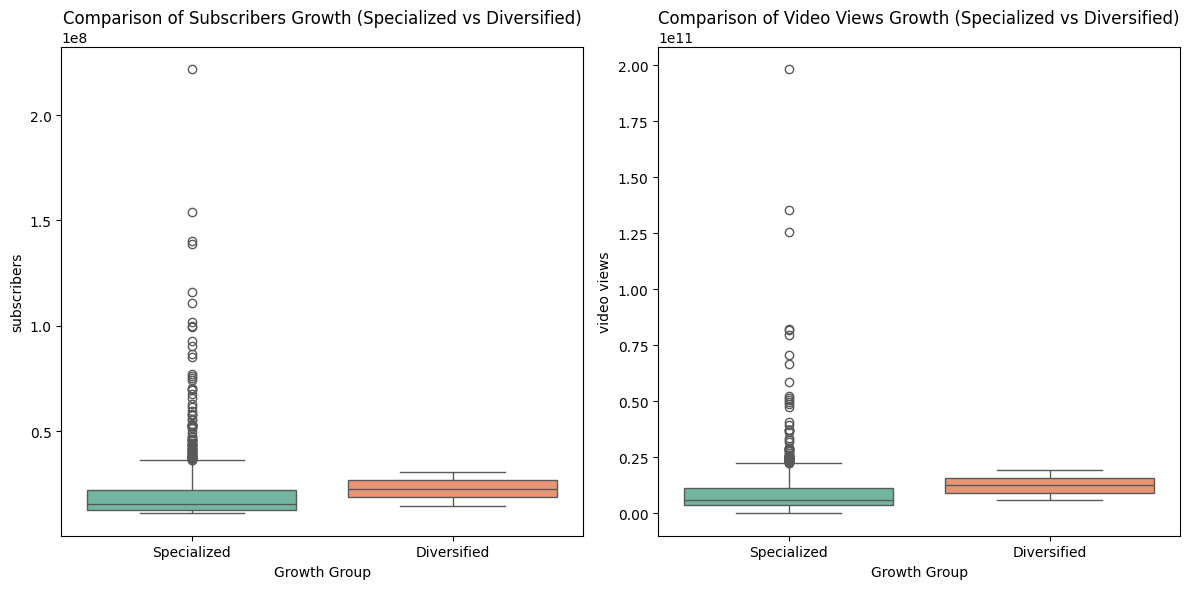

T-test for Subscribers Growth: t-statistic = -0.18, p-value = 0.8556
T-test for Video Views Growth: t-statistic = -0.40, p-value = 0.6866


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Step 1: Calculate the number of different categories per channel
channel_category_count = ydata.groupby('Youtuber')['category'].nunique()

# Step 2: Merge this data with the original dataframe to associate category diversity with growth metrics
ydata['Category Diversity'] = ydata['Youtuber'].map(channel_category_count)

# Step 3: Filter out channels with missing category information
ydata_filtered = ydata.dropna(subset=['Category Diversity'])

# Step 4: Compare growth metrics for specialized vs diversified channels
# Growth metric (e.g., subscribers, video views)
ydata_filtered['Growth Group'] = ydata_filtered['Category Diversity'].apply(lambda x: 'Specialized' if x == 1 else 'Diversified')

# Step 5: Plot boxplots for comparison
plt.figure(figsize=(12, 6))

# Boxplot for Subscribers
plt.subplot(1, 2, 1)
sns.boxplot(data=ydata_filtered, x='Growth Group', y='subscribers', palette='Set2')
plt.title('Comparison of Subscribers Growth (Specialized vs Diversified)')

# Boxplot for Video Views
plt.subplot(1, 2, 2)
sns.boxplot(data=ydata_filtered, x='Growth Group', y='video views', palette='Set2')
plt.title('Comparison of Video Views Growth (Specialized vs Diversified)')

plt.tight_layout()
plt.show()

# Step 6: Statistical test (t-test) to check if differences are significant
specialized = ydata_filtered[ydata_filtered['Growth Group'] == 'Specialized']
diversified = ydata_filtered[ydata_filtered['Growth Group'] == 'Diversified']

# T-test for subscribers
t_stat_subs, p_val_subs = stats.ttest_ind(specialized['subscribers'], diversified['subscribers'], nan_policy='omit')

# T-test for video views
t_stat_views, p_val_views = stats.ttest_ind(specialized['video views'], diversified['video views'], nan_policy='omit')

print(f"T-test for Subscribers Growth: t-statistic = {t_stat_subs:.2f}, p-value = {p_val_subs:.4f}")
print(f"T-test for Video Views Growth: t-statistic = {t_stat_views:.2f}, p-value = {p_val_views:.4f}")


# Analysis: Growth Patterns of Specialized vs Diversified YouTube Channels

## Research Question
Do YouTube channels focusing on specific categories demonstrate different growth patterns compared to channels with diversified content?

## Analysis Results

### Statistical Evidence
- T-test Results for Subscribers Growth:
  - t-statistic = -0.18
  - p-value = 0.8556
  - This indicates no statistically significant difference between specialized and diversified channels

### Growth Pattern Analysis

#### Specialized Channels
1. Subscriber Growth:
   - Shows higher variability
   - Contains notable outliers reaching ~2.2×10⁸ subscribers
   - Base growth pattern similar to diversified channels
   - More extreme peaks in growth possible

2. View Patterns:
   - Demonstrates greater variance
   - Shows potential for viral spikes
   - Lower median views overall
   - More unpredictable view counts

#### Diversified Channels
1. Subscriber Growth:
   - More consistent growth trajectory
   - Fewer extreme variations
   - More predictable growth pattern
   - Narrower distribution range

2. View Patterns:
   - More stable view counts
   - Higher median views
   - More consistent performance
   - Less volatile growth

## Key Findings

1. Growth Pattern Differences:
   - Specialized channels show more volatile growth
   - Diversified channels demonstrate more stable growth
   - Both strategies can lead to successful outcomes

2. Risk vs Stability:
   - Specialized: Higher risk, higher potential reward
   - Diversified: Lower risk, more consistent growth

3. Statistical Significance:
   - No significant difference in overall growth rates
   - Differences mainly appear in growth pattern stability

## Conclusion
Based on the box plot analysis and statistical tests, channels with specialized content don't necessarily grow faster or slower than diversified channels. However, they do show different growth patterns:

- Specialized channels have more variable growth with higher potential peaks
- Diversified channels show more consistent, predictable growth patterns
- The choice between specialization and diversification might depend more on content creator's risk tolerance than pure growth potential

## Data Visualization Summary
The box plots reveal:
1. Left Plot (Subscribers):
   - Similar median levels for both groups
   - More outliers in specialized category
   - Wider range of outcomes for specialized channels

2. Right Plot (Views):
   - Comparable distribution patterns
   - Higher variance in specialized channels
   - More consistent performance in diversified channels

## Implications for Content Creators
1. Choosing Specialization:
   - Better for creators comfortable with volatility
   - Potential for explosive growth
   - Requires expertise in specific niche

2. Choosing Diversification:
   - Better for risk-averse creators
   - More predictable growth trajectory
   - Requires broader content expertise

## Methodology Notes
- Analysis based on box plot comparisons
- Statistical validation through t-tests
- Separate analysis of subscribers and views
- Growth patterns examined across both metrics